# Saving Mark Watney # 

#### Connor Wacker (cjwacker@wisc.edu)
#### Riley Nowakowski (rnowakowski@wisc.edu) 
### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2023 ### 
#### Professor Stephen J. Wright 
https://pages.cs.wisc.edu/~swright/

### May 5, 2023

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Models](#2.-Mathematical-Models)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-Discussion)
1. [Conclusion](#5.-Conclusion) 
1. [Citations](#6.-Citations) 
1. [Appendix](#Appendix)

# 1. Introduction 

The objective of our project is to model and optimize the flight path for the mission to rescue Mark Watney in the movie The Martian, starring Matt Damon. In the plot, astronaut Mark Watney is abandoned and presumed dead. However, when his team discovers he is alive, they devise a plan to employ a gravity assist maneuver, using their spacecraft, the Hermes, to orbit Earth and return to Mars. The mission faces challenges due to the unplanned nature, resulting in unfavorable planetary positions for interstellar travel. Therefore, it becomes crucial to save Mark Watney as quickly as possible. One of the solutions depicted in the movie involves the Hermes performing a gravity assist to utilize Earth's gravitational pull and propel itself towards Mars, thereby conserving time and fuel.
This project incorporates three models. The first model focuses on plotting the flight path from Mars to Earth. The second model, the gravity assist model, represents the pivotal aspect of the mission, involving the gravity assist maneuver. The gravity assist plays a critical role in fuel conservation, which is severely limited. By capitalizing on Earth's gravitational pull, the spacecraft accelerates and alters its trajectory, enabling it to gain speed with minimal thrust. The last model illustrates the journey to Mars for the purpose of retrieving Mark Watney. All these models aim to minimize thrust usage and, consequently, fuel consumption.
Data for this problem is obtained from the sources listed below, which provide information on the departure and return dates of the Hermes from Mars, as well as the initiation of the gravity assist. We utilized a tool called the New Horizons system from NASA's Jet Propulsion Laboratory, which supplies ephemerides (orbit positions and velocities) for any celestial body within the solar system. By inputting the collected mission dates into this tool, we obtained data points representing the positions of the planets during the specified time interval.
The remainder of the project consists of the mathematical models employed to solve the optimization problems. Given the space and gravity factors involved, numerous models are necessary to establish and address the problem. Subsequently, the code implementation section follows, where the models are utilized, and the optimization process is carried out. These models aim to identify an optimal solution, namely, a flight path with minimal thrust usage. The outcomes are discussed in the "Results and Discussion" subsection. Lastly, the conclusion highlights potential issues with the model, areas for further research, and opportunities for improvement.

<br><br> 
**The orbital trajectories start on SOL 6**
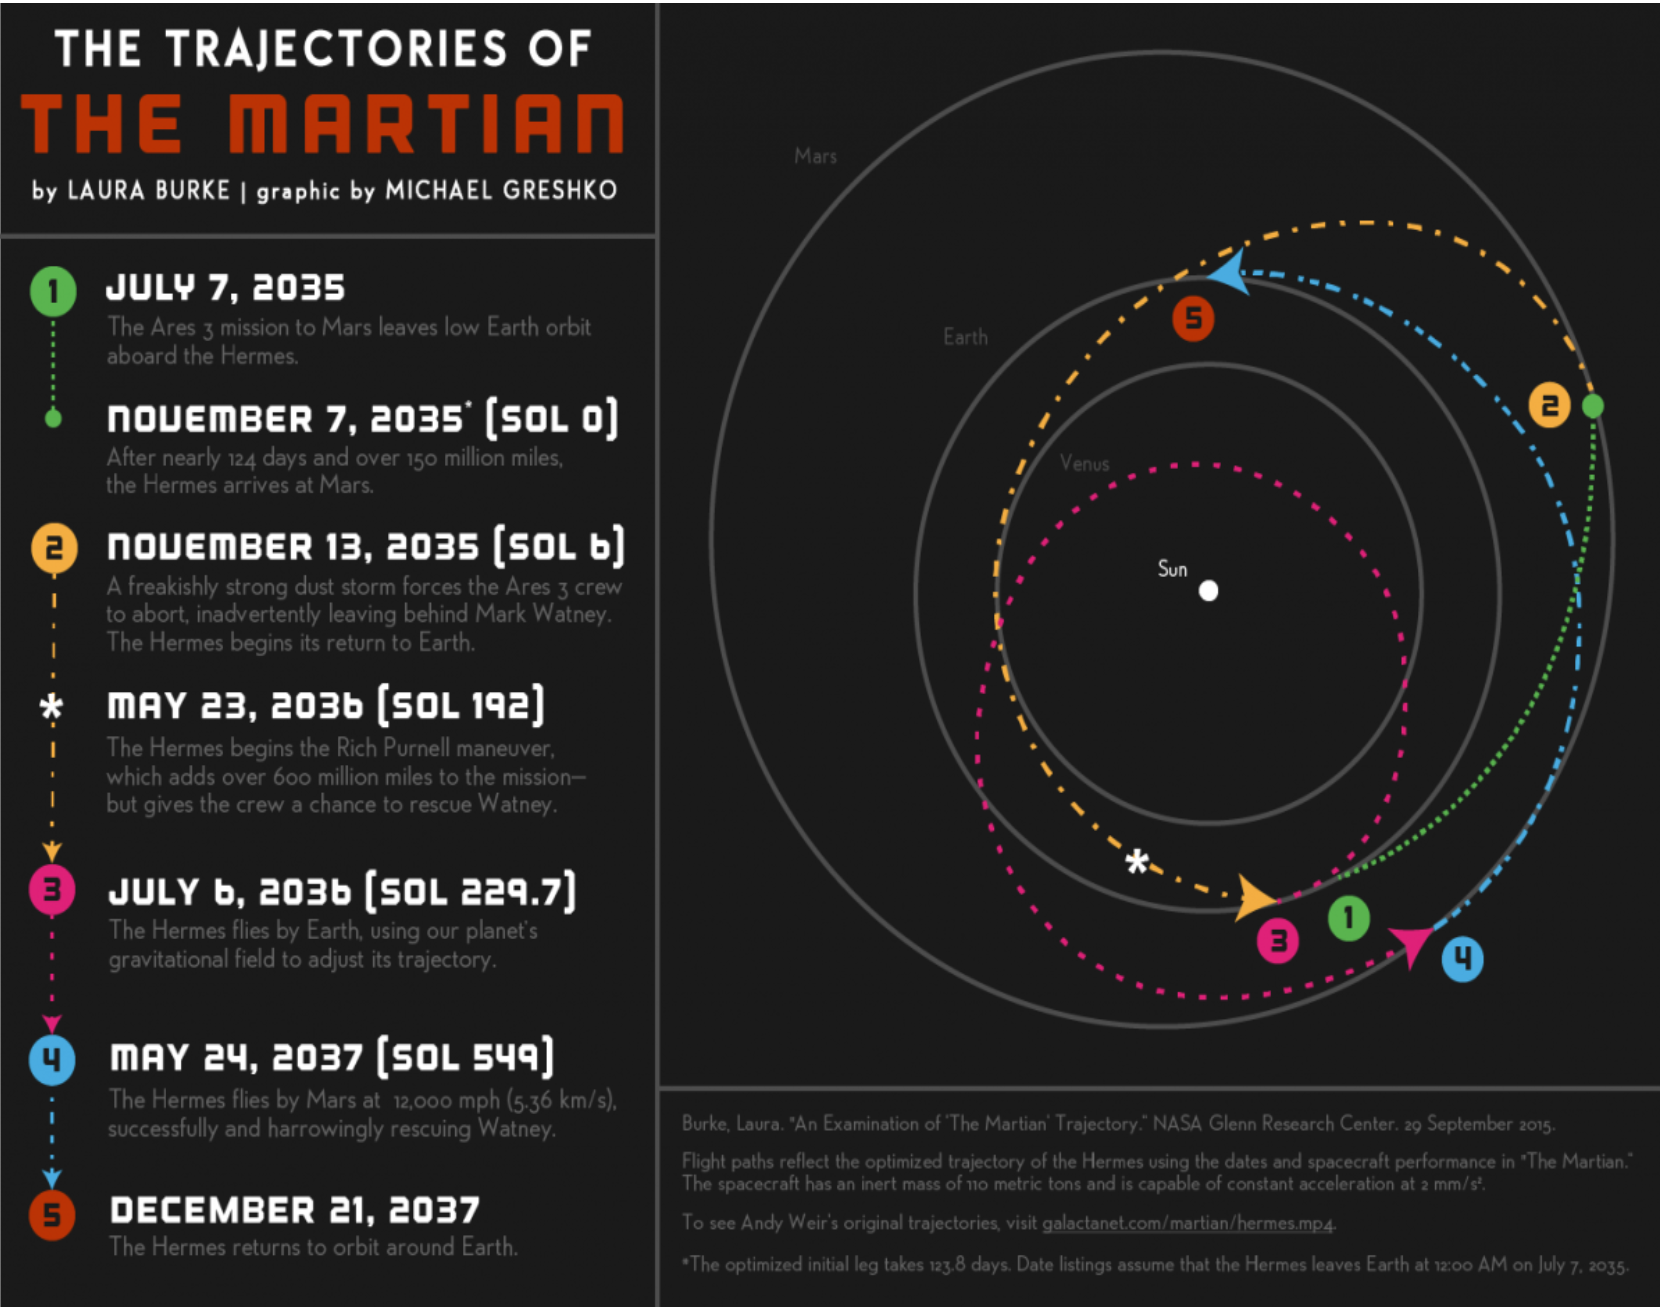 


## Mission Plan
The mission will be broken up into 3 phases: 
1. the leg from Mars to Earth 
2. the "Rich Purnell Maneauver" or the gravity assist 
3. the leg from Earth to Mars 


# 2. Mathematical Models

The classification for the following models are **Nonlinear, Nonconvex Program** or *NLP* for short. This is due to the celestial mechanics of the program, and the fact that there are many local feasible points. With five celestial bodies, all traveling at different rates, the model becomes more complicated. Moreover, our problem requires us to get extremely close Earth while traveling at a very high velocity. Because of this, we will need to guide the program toward a feasible solution as there are many local solutions and even more infeasible points.

## 2.a Intermediate Mathematical Model
$$
\begin{aligned}
\underset{\mathbf{x}_i,\mathbf{v}_i,\mathbf{u}_i \in \mathbb{R^2}}{\text{max}}\qquad& - (\mathbf{x}_{n} - \mathbf{x}_{f}) \cdot (\mathbf{x}_{n} - \mathbf{x}_{f})\\\\
\text{subject to:} \qquad
& \mathbf{x}_{i+1} - \mathbf{x}_{i} - dt \cdot \mathbf{v}_{i} = 0 && \forall i \in \{1,\dots,n-1\}\\
& \mathbf{v}_{i+1} - \mathbf{v}_{i} + dt * \alpha \left(\frac{\mathbf{u}_{i}}{m}  - G \sum_{j=1}^k \frac{M_j}{|\mathbf{p}_{i}^{j} - \mathbf{x}_{i}|^{3/2}} (\mathbf{p}_{i}^j - \mathbf{x}_{i}) \right) = 0 &&\forall i \in \{1,\dots,n-1\}\\ 
& \mathbf{u}_i\cdot \mathbf{u}_i -T_{max}^2\le 0 && \forall i \in \{1,\dots,n\}\\
& (\mathbf{x}_{n} - \mathbf{x}_{f}) \cdot (\mathbf{x}_{n} - \mathbf{x}_{f}) - d_{max}^2 \le 0\\
& \mathbf{x}_{1} - \mathbf{x}_{init} = 0\\
& \mathbf{v}_{1} - \mathbf{v}_{init} = 0\\
& \text{where:}\\  
& \qquad n \text{ is the number of time steps}\\
& \qquad k \text{ is the number of celestial bodies}\\
& \qquad M_j \text{ is the mass of the j}^{\text{th}}\text{ celestial body (kg)}\\ 
& \qquad \mathbf{r}_{i}^{j} \text{ is the position of celestial body } j \text{ at timestep } i\\
& \qquad \mathbf{x}_{init}, \text{ is the initial position of the Hermes} \\
& \qquad \mathbf{x}_{f} \text{ is the initial and ideal final position of the Hermes}\\
& \qquad \mathbf{v}_{init} \text{ is the initial velocity of the probe}\\ 
& \qquad dt \text{ is timestep [days]}\\
& \qquad \alpha \text{ is the acceleration conversion (from } \frac{\text{m}}{\text{s}^2} \text{ to } \frac{\text{au}}{\text{day}^2} \text{)}\\
& \qquad m \text{ is the mass of the probe (kg)}\\
& \qquad G \text{ is the universal gravitational constant } \Bigg(\frac{\text{Newton}\cdot\text{au}^2}{\text{kg}^2}\Bigg)\\
& \qquad T_{max} \text{ is the maximum thrust feasible for the Hermes (N)}\\ 
\end{aligned} 
$$ 
<br><br> 
The intermediate model is designed to help estimate the amout of time it takes for the Hermes to travel from one planet to another. The models used are discrete because we cannot minimize time, as we must implement a timestep. Therefore we wish to evaluate how close the Hermes can get to Earth given a certain time frame.

## Phase 1: Mars to Earth
$$
\begin{aligned}
\underset{\mathbf{x}_i,\mathbf{v}_i,\mathbf{u}_i \in \mathbb{R^2}}{\text{max}}\qquad& -\sum_{i=1}^{n}\mathbf{u}_i\cdot \mathbf{u}_i - \lambda\sum_{i=1}^{n-1} ||\mathbf{u}_{i} - \mathbf{u}_{i+1}||^2 + \mu\Big(\mathbf{x}_{f} \cdot \mathbf{x}_{f}\Big) \\
\text{subject to:} \qquad
& \mathbf{x}_{i+1} - \mathbf{x}_{i} - dt \cdot \mathbf{v}_{i} = 0 && \forall i \in \{1,\dots,n-1\}\\
& \mathbf{v}_{i+1} - \mathbf{v}_{i} + dt * \alpha \left(\frac{\mathbf{u}_{i}}{m}  - G \sum_{j=1}^k \frac{M_j}{||\mathbf{p}_{i}^{j} - \mathbf{x}_{i}||^{2}} (\mathbf{p}_{i}^j - \mathbf{x}_{i}) \right) = 0 &&\forall i \in \{1,\dots,n-1\}\\ 
& \mathbf{u}_i\cdot \mathbf{u}_i -T_{max}^2\le 0 && \forall i \in \{1,\dots,n\}\\
& (\mathbf{x}_{n} - \mathbf{x}_{f}) \cdot (\mathbf{x}_{n} - \mathbf{x}_{f}) - d_{max}^2 \le 0\\
& \mathbf{x}_{1} - \mathbf{x}_{init} = 0\\
& \mathbf{v}_{1} - \mathbf{v}_{init} = 0\\ 
& \text{where:}\\  
& \qquad n \text{ is the number of time steps}\\
& \qquad k \text{ is the number of celestial bodies}\\
& \qquad M_j \text{ is the mass of the j}^{\text{th}}\text{ celestial body (kg)}\\ 
& \qquad \mathbf{p}_{i}^{j} \text{ is the position of celestial body } j \text{ at timestep } i\\
& \qquad \mathbf{x}_{init}, \text{ is the initial position of the Hermes} \\
& \qquad \mathbf{x}_{f} \text{ is the initial and ideal final position of the Hermes}\\
& \qquad \mathbf{v}_{init} \text{ is the initial velocity of the probe}\\ 
& \qquad dt \text{ is timestep [days]}\\
& \qquad \alpha \text{ is the acceleration conversion (from } \frac{\text{m}}{\text{s}^2} \text{ to } \frac{\text{au}}{\text{day}^2} \text{)}\\
& \qquad m \text{ is the mass of the probe (kg)}\\
& \qquad G \text{ is the universal gravitational constant } \Bigg(\frac{\text{Newton}\cdot\text{au}^2}{\text{kg}^2}\Bigg)\\
& \qquad T_{max} \text{ is the maximum thrust feasible for the Hermes (N)}\\ 
& \qquad \mathbf{x}_{f} \text{ is the final velocity of the Hermes in the }x \text{ direction}  \\
& \qquad \lambda ,\mu \text{ are weights for the objective}
\end{aligned} 
$$ 
<br><br> 


The objective for phase 1 is to minimize thrust while implementing an $L2$ normalization as the booster cannot perform arbitrary bursts. The objective also includes a final velocity maximizing factor as the Hermes must approach the Earth at a great enough speed in order to be able to perform a gravity assist. 


## Phase 2 Model: Gravity Assist
Unfortunately we are unable to implement the gravity assist within an optimization model given the software available. Methods such as implementing waypoints, presolving the model using a linear trajectory around the earth, and implementing differential equations to optimize the trajectory and minimize the resulting time result in too many points of infeasibility as the dynamics are too complicated for the *Ipopt* library in Julia. We therefore implement a standard gravity assist formulation, using the initial conditions from phase 1 to calculate the final position and velocity of the Hermes, which are then used as the initial conditions in the phase 3 model. 
<br><br>
$$
\begin{aligned} 
\large
\vec{v}_{final} = \vec{v}_{init}R(\alpha) + \Delta\vec{v} + \frac{u}{m}t_{CA} \\ 
\large
\vec{x}_{final} = \vec{x}_{init} + \vec{v}_{final} \\ 
\end{aligned}
$$ 

<br>

$$
\begin{aligned}
& \text{where:} \\
&\qquad \vec{v}_{final} \text{ is final velocity vector of the spacecraft} \\
&\qquad \vec{v}_{start} \text{ is initial velocity vector of the spacecraft} \\
&\qquad R(\alpha) \text{ is the rotation matrix that rotates the initial velocity vector by an angle } \alpha \\
&\qquad \alpha \text{ is the angle of rotation (in degrees)} \\
&\qquad \Delta\vec{v} \text{ is change in velocity vector due to the gravity assist} \\
&\qquad u \text{ is thrust} \\
&\qquad m \text{ is mass of the spacecraft} \\
&\qquad t_{CA} \text{ is time of closest approach to the planet} \\ 
\end{aligned}
$$ 

## Phase 3 Model: Earth to Mars
$$
\begin{aligned}
\underset{\mathbf{x}_i,\mathbf{v}_i,\mathbf{u}_i \in \mathbb{R^2}}{\text{max}}\qquad& -\sum_{i=1}^{n}\mathbf{u}_i\cdot \mathbf{u}_i - \lambda\sum_{i=1}^{n-1} ||\mathbf{u}_{i} - \mathbf{u}_{i+1}||^2 - \mu\Big(\mathbf{x}_{f} \cdot \mathbf{x}_{f} - \mathbf{x}_{f}^{mars} \cdot \mathbf{x}_{f}^{mars}\Big) \\
\text{subject to:} \qquad
& \mathbf{x}_{i+1} - \mathbf{x}_{i} - dt \cdot \mathbf{v}_{i} = 0 && \forall i \in \{1,\dots,n-1\}\\
& \mathbf{v}_{i+1} - \mathbf{v}_{i} + dt * \alpha \left(\frac{\mathbf{u}_{i}}{m}  - G \sum_{j=1}^k \frac{M_j}{|\\mathbf{p}_{i}^{j} - \mathbf{x}_{i}||^{2}} (\mathbf{p}_{i}^j - \mathbf{x}_{i}) \right) = 0 &&\forall i \in \{1,\dots,n-1\}\\ 
& \mathbf{u}_i\cdot \mathbf{u}_i -T_{max}^2\le 0 && \forall i \in \{1,\dots,n\}\\
& (\mathbf{x}_{n} - \mathbf{x}_{f}) \cdot (\mathbf{x}_{n} - \mathbf{x}_{f}) - d_{max}^2 \le 0\\
& \mathbf{x}_{1} - \mathbf{x}_{init} = 0\\
& \mathbf{v}_{1} - \mathbf{v}_{init} = 0\\ 
& \text{where:}\\  
& \qquad n \text{ is the number of time steps}\\
& \qquad k \text{ is the number of celestial bodies}\\
& \qquad M_j \text{ is the mass of the j}^{\text{th}}\text{ celestial body (kg)}\\ 
& \qquad \mathbf{r}_{i}^{j} \text{ is the position of celestial body } j \text{ at timestep } i\\
& \qquad \mathbf{x}_{init}, \text{ is the initial position of the Hermes} \\
& \qquad \mathbf{x}_{f} \text{ is the initial and ideal final position of the Hermes}\\
& \qquad \mathbf{v}_{init} \text{ is the initial velocity of the Hermes}\\ 
& \qquad dt \text{ is timestep [days]}\\
& \qquad \alpha \text{ is the acceleration conversion (from } \frac{\text{m}}{\text{s}^2} \text{ to } \frac{\text{au}}{\text{day}^2} \text{)}\\
& \qquad m \text{ is the mass of the probe (kg)}\\
& \qquad G \text{ is the universal gravitational constant } \Bigg(\frac{\text{Newton}\cdot\text{au}^2}{\text{kg}^2}\Bigg)\\
& \qquad T_{max} \text{ is the maximum thrust feasible for the Hermes (N)}\\ 
& \qquad \mathbf{x}_{f} \text{ is the final velocity of the Hermes in the }x \text{ direction}  \\
& \qquad \lambda ,\mu \text{ are weights for the objective}
\end{aligned} 
$$ 
<br><br>  
The final model is roughly the same as our phase 1 model with one difference in the objective. Instead of maximizing the final velocity of the Hermes as we did in phase 1, we are minimizing it in phase 3. Because Mark Watney will be leaving mars from a relatively low velocity, the Hermes will have to match mars' velocity in order to catch the stranded astronaut. In the movie, the Hermes slows down to a mere 40m/s, compared to the roughly 30 km/s it reaches before performing the gravity assist around Earth.

# 3. Solution 

### 3a. Background Information 
**all code is written in the Julia programming language**

In [ ]:
#run this block ONLY if packages have not been downloaded 
Pkg.add("Plots")  #graphing library
Pkg.add("DataFrames") 
Pkg.add("CSV") 
Pkg.add("JuMP")   #Optimization Modeling library
Pkg.add("Ipopt")  #nonlinear optimizer

In [1]:
using Pkg
Pkg.add("PythonPlot") #uncommon additional graphing library

    Updating registry at `C:\Users\wacke\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\wacke\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\wacke\.julia\environments\v1.8\Manifest.toml`


#### Inner Solar System Celestial Mechanics  

This graph depicts the positions of the planets at any given point from the start of the mission to when the Hermes saves Mark from mars (Sol 549).

In [4]:
using JuMP, Ipopt, CSV, DataFrames, Plots; pythonplot()

Plots.PythonPlotBackend()

In [5]:
mercury_raw = DataFrame(CSV.File("mercury_data.csv")) 
venus_raw = DataFrame(CSV.File("venus_data.csv")) 
earth_raw = DataFrame(CSV.File("earth_data.csv")) 
mars_raw = DataFrame(CSV.File("mars_data.csv")) 

mercuryPosition = mercury_raw[:,["X","Y"]]
venusPosition = venus_raw[:,["X","Y"]] 
earthPosition = earth_raw[:,["X","Y"]]
marsPosition = mars_raw[:,["X","Y"]]
total_days = Int(round(length(marsPosition[:,"Y"])/12))
;

In [6]:
function plot_trajectories(start=1,ending=total_days) 
    global mercuryPosition 
    global venusPosition 
    global earthPosition
    global marsPosition 
    
    SunX = 0 
    SunY = 0
    step = ending*12
    interval = start:step
    startPosition=cat(Vector(mercuryPosition[start,:]),Vector(venusPosition[start,:]),Vector(earthPosition[start,:]),Vector(marsPosition[start,:]),dims=2)'
    endPosition=cat(Vector(mercuryPosition[step,:]),Vector(venusPosition[step,:]),Vector(earthPosition[step,:]),Vector(marsPosition[step,:]),dims=2)'
    start_date = split(mercury_raw[start,"Date"]," ")[3]
    end_date = split(mercury_raw[step,"Date"]," ")[3]

    theme(:juno)
    scatter([SunX],[SunY],mc=:yellow,ms=8,label="Sun",markerstrokewidth = .5) 
    plot!(mercuryPosition[interval,"X"],mercuryPosition[interval,"Y"],label="Mercury")
    plot!(venusPosition[interval,"X"],venusPosition[interval,"Y"],label="Venus") 
    plot!(earthPosition[interval,"X"],earthPosition[interval,"Y"],label="Earth") 
    plot!(marsPosition[interval,"X"],marsPosition[interval,"Y"],label="Mars") 
    plot!(xticks=-2:.2:2,yticks=-2:.2:2,xlim=[-2,2],ylim=[-2,2],xlabel="AU_{X}",ylabel="AU_{y}")
    scatter!(startPosition[:,1],startPosition[:,2],mc=:white,ms=4,markerstrokewidth = .1,label="Start")
    scatter!(endPosition[:,1],endPosition[:,2],mc=:white,ms=4,markerstrokewidth = .1,markershape=:dtriangle,label="End")
    plot!(plot!(legend=:outerright, legendcolumns=1)) 
    

    
    title!("Inner Solar System Trajectories $start_date to $end_date")
    plot!(size=(1000,850))
end

plot_trajectories (generic function with 3 methods)

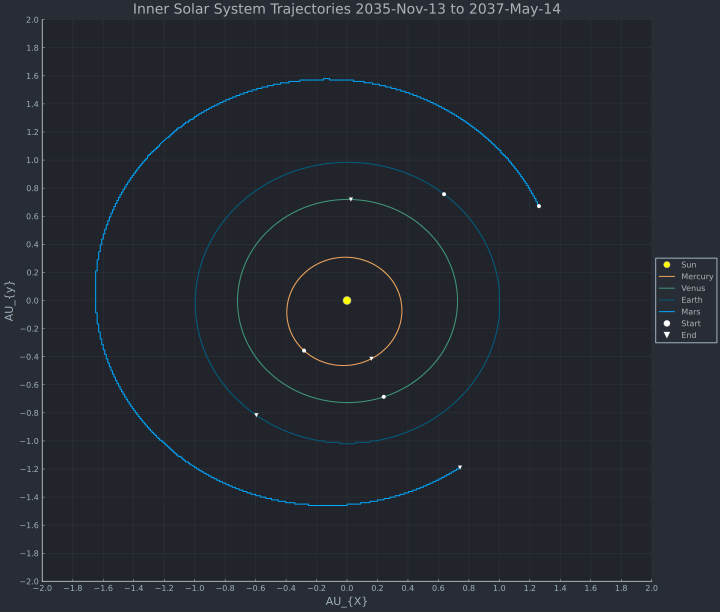

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [7]:
plot_trajectories(1,549)

### Celestial Mechanics
The gravitational force of a celestial body can be calculated using the following equation: <br><br>
$\begin{aligned}\qquad\mathbf{F}_{g} - \frac{GM_{E}m}{r^2}\mathbf{\hat{r}}\end{aligned}$ <br>
<br><br>
where $\mathbf{F}{g}$ is the gravitational force, $G$ is the gravitational constant, $M{E}$ is the mass of the Earth, $m$ is the mass of the spacecraft, $r$ is the distance between the spacecraft and Earth, and $\mathbf{\hat{r}}$ is a unit vector in the direction of the spacecraft. <br>
<br>
To model the, we can add this gravitational force term to our constraint equation, similar to the way we included the force from the other gravity sources. The gravitational force of Earth will act as an additional acceleration term, which will affect the velocity and position of the spacecraft, giving us this constraint: <br>
$\begin{aligned}\mathbf{v}_{i+1} - \mathbf{v}_{i} + dt * \alpha \left(\frac{\mathbf{u}_{i}}{m}  - G \sum_{j=1}^k \frac{M_j}{|\mathbf{p}_{i}^{j} - \mathbf{x}_{i}|^{3/2}} (\mathbf{p}_{i}^j - \mathbf{x}_{i}) \right) = 0\end{aligned}\\$


Similarly, the equation for the potential energy of a point mass in a gravitational field is:

$U = -\frac{GMm}{r}$

where $G$ is the gravitational constant, $M$ is the mass of the attracting body, $m$ is the mass of the attracted body, $r$ is the distance between the centers of the two bodies, In the case of a point mass being attracted to a fixed sink, the equation simplifies to: <br>
<br>
$U = -\frac{GMm}{\sqrt{(x-x_s)^2 + (y-y_s)^2}}$ <br>
<br>
where $(x,y)$ are the coordinates of the point mass, $(x_s,y_s)$ are the coordinates of the sink, $G$ is the gravitational constant. The graph below is an artificial representation of gravity around a body of mass:

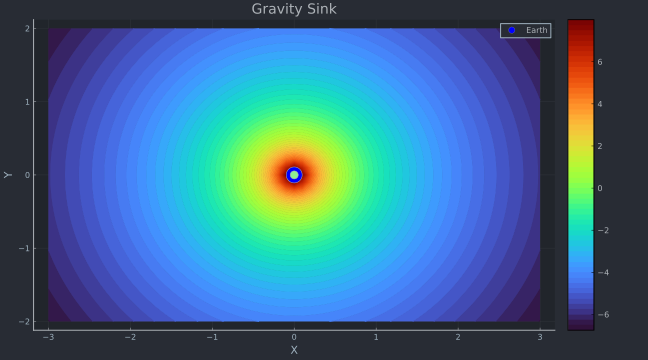

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [8]:
x = -3:.1:3;               # x and y axis limits
y = -2:.1:2;
G = 0.5 #toy gravitational constant for x and y range
earth_round = 9e-5

sinkx = ((earth_round + earth_round*3) + (earth_round - earth_round*3))/2
#***** GENERATE GRAVITY POTENTIAL FIELD *****# 
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x)) 

sinkPos = [0 0]            # location of gravity sink  (x,y)   
W =  (log.((G*(-X .+ sinkPos[1])./((-X .+ sinkPos[1]).^2 .+ (-Y .+ sinkPos[2]).^2).^1.5).^2 .+ 
      (G*(-Y .+ sinkPos[2])./((-X .+ sinkPos[1]).^2 .+ (-Y .+ sinkPos[2]).^2).^1.5).^2))
contourf(x, y, W, levels=70, color=:turbo,grid=true) 

scatter!([sinkPos[1]],[sinkPos[2]],mc=:blue,ms=16,markerstrokewidth = .5,label="Earth") 
scatter!([sinkPos[1]],[sinkPos[2]],mc=:lightgreen,ms=8,markerstrokewidth = .5,label=nothing) 
plot!(size=(900,500),title="Gravity Sink",xlabel="X",ylabel="Y")

By implementing our intermediate model in the function below, we can determine the shortest time it takes to travel from one point in space to another. It should be noted that the gravity sink in this model is static and not dynamic. This demonstration is to depict the behavior of a spacecraft interacting with gravity in a two dimensional space.

In [9]:
function SolveOpt(dt)
    #++++++ INITIAL TOY PARAMETERS ++++++#
    startPos = [5 -2]
    eathPos = [0 0] 
    finalPos = [5 2]
    G = .5  
    initV = [0 0] 
    sinkPos = [6 0] 

    Tmax = .01
    maxDist = .08 

    m = Model(Ipopt.Optimizer) 
    @variable(m, HX[1:dt,1:2]) 
    @variable(m, HV[1:dt,1:2]) 
    @variable(m, HU[1:dt,1:2]) 

    #++++++ MINIMIZE DISTANCE FOR EACH STEP ++++++#
    @NLobjective(m, Min, sum((HX[i,1] - finalPos[1])^2 + (HX[i,2] - finalPos[2]^2) for i in 1:dt))

    for i in 1:dt-1
        #++++++ CURRENT POS IS PREV. POSITION + PREV. VELOCITY ++++++#
        @constraint(m, [j in 1:2], HX[i+1,j] == HX[i,j] + HV[i,j])

        #++++++ CURRENT VELOCITY IS PREV. + THRUST + GRAVITY ++++++# 
        @NLconstraint(m, HV[i+1,1] == HV[i,1] + HU[i,1] + 
            G*(sinkPos[1] - HX[i,1])/((sinkPos[1] - HX[i,1])^2 + (sinkPos[2] - HX[i,2])^2)^1.5) 
        @NLconstraint(m, HV[i+1,2] == HV[i,2] + HU[i,2] + 
            G*(sinkPos[2] - HX[i,2])/((sinkPos[1] - HX[i,1])^2 + (sinkPos[2] - HX[i,2])^2)^1.5) 
    end

    #++++++ KEEP THRUST BELOW CERTAIN VALUE ++++++#
    @constraint(m,[i in 1:dt], (HU[i,1]^2 + HU[i,2]^2 <= Tmax^2))  

    #++++++ INITIAL CONSTRAINTS FOR SPACECRAFT ++++++# 
    @constraint(m, [j in 1:2], HX[1,j] == startPos[j]) 
    @constraint(m, [j in 1:2], HV[1,j] == initV[j]) 

    #++++++ RENDEZVOUS CONSTRAINTS FOR SPACECRAFT ++++++#
    @constraint(m, sum((HX[dt,j] - finalPos[j])^2 for j in 1:2) <= 0)

    set_silent(m)
    optimize!(m) 

    Z = value.(HX) 

    x = -2:.1:12
    y = -4:.1:4

    #++++++ GENERATE GRAVITY SINK VISUALIZATION +++++++# 
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x)) 

    W =  (log.(G*((-X .+ sinkPos[1])./((-X .+ sinkPos[1]).^2 .+ (-Y .+ sinkPos[2]).^2).^1.5).^2 .+  #implement the log for better visualization
        (G*(-Y .+ sinkPos[2])./((-X .+ sinkPos[1]).^2 .+ (-Y .+ sinkPos[2]).^2).^1.5).^2)) 

    position = contourf(x, y, W, levels=70, color=:turbo,grid=true,xlabel="AU_{x}",ylabel="AU_{y}")

    plot!(position, Z[:,1], Z[:,2],xlim=(-1,12),ylim=(-4,4),label="trajectory",linestyle=:dot,linewidth=1.5)
    scatter!(position, [startPos[1]], [startPos[2]], mc=:white,ms=5,label="start")
    scatter!(position, [finalPos[1]], [finalPos[2]], mc=:green,ms=5,label="finish")
    scatter!(position, [sinkPos[1]],[sinkPos[2]],mc=:blue,ms=15,markerstrokewidth = .5,label="Earth") 
    scatter!(position, [sinkPos[1]],[sinkPos[2]],mc=:lightgreen,ms=7,markerstrokewidth = .5,label=nothing) 
    title!(position,"Minimize Duration: $dt days")
    plot!(position,size=(900,500))  

    #++++++ PLOT THRUST ++++++#
    thrust = value.(HU)  
    total_thrust = Vector()
    for i in 1:dt
        tt = (thrust[i,1]^2 + thrust[i,2]^2)^.5
        append!(total_thrust,tt) 
    end
    T = plot(thrust[:,1],label="U_{x}",xlabel="days",ylabel="magnitude",title="Thrust (U)",xlim=(0,dt+1),xticks=0:2:dt)
    plot!(T, thrust[:,2],label="U_{y}") 
    plot!(T, total_thrust,label="||V||",linewidth=2) 

    #+++++++ PLOT VELOCITY +++++++#
    velocity = value.(HV)  
    total_velocity = Vector()
    for i in 1:dt
        tv = (velocity[i,1]^2 + velocity[i,2]^2)^.5
        append!(total_velocity,tv) 
    end
    V = plot(velocity[:,1],label="V_{x}",xlabel="days",ylabel="magnitude",title="Velocity (V)",xlim=(0,dt+1),xticks=0:2:dt)
    plot!(V, velocity[:,2],label="V_{y}") 
    plot!(V, total_velocity,label="||V||",linewidth=2)   

    
    return plot(position, V, T, layout=(3,1), legend=:right, size=(900, 1600))
    
end

SolveOpt (generic function with 1 method)

In [10]:
SolveOpt(9) #9 SECONDS


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



As observed above, the spacecraft minimizes the distance between itself and the final point for each point in time. Notice how the spacecraft, instead of taking a straight path to minimize distance, has a slightly curved path. This is due to the effect of the celestial body's gravity, where it avoids the gravitational pull so that it isn't thrown off course.

## 3b. Phase 1: Mars to Earth
In the movie, a scientist named Rich Purnell proposes what is known as a "gravity assist" around earth, where the hermes space craft would use the the earth's gravity to slingshot itself back towards mars, increasing the magnitude of velocity and redirecting it in the correct direction. This maneuver and its associated model is very complicated to solve, requiring a great enough initial velocity and an approach from the right angle. In the movie, Rich Purnell even broke into NASA's Jet Propulsion Laboratory and used it's Super Computer to calculate whether or not the problem is feasible. Unfortunately we do not have access to those resources, so we will be using Julia's Ipopt module, and use certain methods to find a feasible point which will be further addressed. <br>
The first phase of the gravity assist is the approach. The Hermes, like the planets, must counterclockwise with respect to the sun. Therefore due to the current positions of the planet, the Hermes must circle the sun in order to reach earth. The difficulty with the model is that there exist many local solutions and even more points of infeasibility as we are modeling in a 2-dimensional space with many time steps. Therefore, we need to guide the program to the correct solution. By setting the initial decision variables to certain points in space, for example an artificial trajectory, we can give the model a head start. 
<br><br>
$$ 
\begin{aligned}  
&
\begingroup  
\large
\mathbf{x}_{i}^{\text{est.}} = (1-\frac{i}{n})*\mathbf{x}_{i}^{\text{start}} + \frac{i}{n}*\mathbf{x}_{i}^{\text{dest}} + \mathbf{C} \qquad \forall i \in {1,\dots,n}\\   
\endgroup\\
& \text{where:}\\
& \qquad \mathbf{C} \text{ represents an offset for the planet's initial position from Mars}\\ 
\end{aligned}
$$
<br>

The associated velocity values are then estimated using the kinematic equation $\mathbf{v} = \frac{d\mathbf{x}}{dt}$:
<br>
$$ 
\begin{aligned} 
&\begingroup 
\large
\mathbf{v}_{i}^{\text{est.}} = dt*\left(\mathbf{x}_{i+1}^{\text{est.}} - \mathbf{x}_{i}^{\text{est.}}\right) \qquad \forall i \in {1,\dots,n-1}\\ 
\endgroup\\
&\text{where:}\\
& \qquad dt \text{ is the timestep in days}\\ 
 \end{aligned}
$$


Unfortunately, the kinematic equation is not enough to guide the model toward an optimal solution. We were forced to add following constraints to our model in order to further guide the model toward a feasible solution: <br>
* Must use a minimum amount of thrust at any given point in time <br>
* Must be at least a certain distance from the sun <br> 
* Must not leave the inner solar system  <br>
* Max thrust must be set to *fill* despite having an actual max thrust of 220N  <br>

These constraints were all adding while solving our intermediate models. Because the solve time takes a very long time and there are so many local minimums, the Hermes add a tendency to change its thrust magnitude, despite implementing a *L2* normalization factor for thrust in the objective function.

In order to fulfill the initial requirements for a gravity assist, we used the following constraints: <br>
* Hermes final velocity $HV_{y}$ must be greater or equal to Earth's final velocity to perform the gravity assist at the right angle <br>
* Hermes final velocity $HV_{x}$ must be greater than than Earth's final *x* velocity to perform the gravity assist at a fast enough speed <br>
* Hermes final *x* and *y* position must be greater than Earth's final *x* and *y* position to perform gravity assist at the correct angle <br>

In [11]:
interV = 12   #data interval (original data intervals (2hrs) was too many for the model)
dt = interV/12 #timestep

# NOTE: Ephemerides must be in same directory as .ipynb file
mercury_raw = DataFrame(CSV.File("mercury_data.csv")) 
venus_raw = DataFrame(CSV.File("venus_data.csv")) 
earth_raw = DataFrame(CSV.File("earth_data.csv")) 
mars_raw = DataFrame(CSV.File("mars_data.csv"))  


mercuryPosition = mercury_raw[1:interV:end,["X","Y"]]
venusPosition = venus_raw[1:interV:end,["X","Y"]] 
earthPosition = earth_raw[1:interV:end,["X","Y"]]
marsPosition = mars_raw[1:interV:end,["X","Y"]] 
;

#++++++ MASSES IN KG ++++++#
sunMass = 1.99e30
mercuryMass = 3.30e23
venusMass = 4.87e24
earthMass = 5.97e24
marsMass = 6.42e23
hermesMass = 1.1e5

#++++++ MISC PARAMETERS ++++++#
sunPos = [0, 0]         
G = 2.98e-33       # Gravitational constant in units of newtons*AU^2/Kg^2
Tmax = 220  # converts M/s^2 to AU/day^2 
minSun = 0.23396054928 #cannot come too close to sun   
maxSun = 1.5 #cannot leave inner solar system
marsInitV = [-6.054626969549614e-03,  1.354296174136115e-02] #mars initial velocity 
α = .0499 #acceleration conversion from m/s^2 to AU/DAY^2
earthEndV = [1.691516474390618e-02,  7.095973379846021e-04]
#++++++ ADJUSTABLE PARAMETERS ++++++#
PhaseLength = 225 # how long journey takes in days (manually adjusted) 
λ = 100 
μ = 10

step = Int64(round(PhaseLength/dt))   # time step

#++++++ CONVERT DATAFRAME TO MATRIX FOR FASTER COMPUTATION ++++++#
mercuryData = Matrix(mercuryPosition[:,1:2])
venusData = Matrix(venusPosition[:,1:2])
earthData = Matrix(earthPosition[:,1:2])
marsData = Matrix(marsPosition[:,1:2])

startData = marsData
destData = earthData
;

In [12]:
using JuMP, Ipopt, CSV, DataFrames, LinearAlgebra, Plots; pythonplot()

Plots.PythonPlotBackend()

**Solves at around 1 min. with a robust processor, longer otherwise**

In [13]:
m = Model(Ipopt.Optimizer)  
set_optimizer_attributes(m, "print_level" => 3, "max_iter" => 8000)


#***** DEFINE VARIABLES FOR PROBE POSITIONS, VELOCITIES, AND THRUSTS *****#
@variable(m, HX[1:2,1:step])
@variable(m, HV[1:2,1:step])
@variable(m, HU[1:2,1:step])

#***** DEFINING ESTIMATED LINEAR TRAJECTORY *****#
offSet = ones(2,1)*.005
initLinearPos = zeros(2,step)
initLinearVel = zeros(2,step)

for i in 1:step
    factor = i/step
    initLinearPos[:,i] = (marsData[i,1:2]'.*(1-factor)+earthData[i,1:2]'.*factor .+ offSet')
end
for i in 1:step-1
    initLinearVel[:,i] = (initLinearPos[:,i+1]-initLinearPos[:,i])*dt
end

#++++++ ASSIGN VALUEs TO VARIABLES ++++++#
for i in 1:2 
    for j in 1:step
        set_start_value(HX[i,j], initLinearPos[i,j])
        set_start_value(HV[i,j], initLinearVel[i,j]) 
    end
end;

In [14]:
for i in 1:step-1
    #++++++ CURRENT POS IS PREV. POSITION + PREV. VELOCITY ++++++#
    @constraint(m, HX[:,i+1] .== HX[:,i] + dt*HV[:,i])
    
    #++++++ CURRENT VELOCITY IS PREV. + THRUST + GRAVITY ++++++#
    @NLconstraint(m, HV[1,i+1] == HV[1,i] + dt*α*(HU[1,i]/hermesMass + 
        sunMass*G*(sunPos[1] - HX[1,i])/((HX[1,i] - sunPos[1])^2 + (HX[2,i] - sunPos[2])^2)^1.5 +
        mercuryMass*G*(mercuryData[i,1] - HX[1,i])/((HX[1,i] - mercuryData[i,1])^2 + 
            (HX[2,i] - mercuryData[i,2])^2)^1.5 +
        venusMass*G*(venusData[i,1] - HX[1,i])/((HX[1,i] - venusData[i,1])^2 + (HX[2,i] - venusData[i,2])^2)^1.5 +
        earthMass*G*(earthData[i,1] - HX[1,i])/((HX[1,i] - earthData[i,1])^2 + (HX[2,i] - earthData[i,2])^2)^1.5 +
        marsMass*G*(marsData[i,1] - HX[1,i])/((HX[1,i] - marsData[i,1])^2 + (HX[2,i] - marsData[i,2])^2)^1.5))# +
    @NLconstraint(m, HV[2,i+1] == HV[2,i] + dt*α*(HU[2,i]/hermesMass + 
        sunMass*G*(sunPos[2] - HX[2,i])/((HX[1,i] - sunPos[1])^2 + (HX[2,i] - sunPos[2])^2)^1.5 + 
        mercuryMass*G*(mercuryData[i,2] - HX[2,i])/((HX[1,i] - mercuryData[i,1])^2 + 
            (HX[2,i] - mercuryData[i,2])^2)^1.5 + 
        venusMass*G*(venusData[i,2] - HX[2,i])/((HX[1,i] - venusData[i,1])^2 + (HX[2,i] - venusData[i,2])^2)^1.5 +
        earthMass*G*(earthData[i,2] - HX[2,i])/((HX[1,i] - earthData[i,1])^2 + (HX[2,i] - earthData[i,2])^2)^1.5 +
        marsMass*G*(marsData[i,2] - HX[2,i])/((HX[1,i] - marsData[i,1])^2 + (HX[2,i] - marsData[i,2])^2)^1.5))
end

#++++++ KEEP THRUST BELOW CERTAIN VALUE ++++++#
@constraint(m, Tmax .<= (HU[1,:].^2+HU[2,:].^2) .<= Tmax^2)

#++++++ INITIAL CONSTRAINTS FOR HERMES ++++++#
@constraint(m, HX[:,1] .== [startData[1,1] - .005, startData[1,2]])
@constraint(m, HV[:,1] .== marsInitV[:])   

#++++++ RENDEZVOUS CONSTRAINTS FOR HERMES ++++++#
@constraint(m, (HX[1, step]-destData[step, 1])^2 + (HX[2, step]-destData[step,2])^2 <= .0005^2) 
@constraint(m, (HX[1, step] <= destData[step, 1])) #.001
@constraint(m, (HX[2, step] <= destData[step,2])) 

#++++++ MIN DISTANCE FROM SUN ++++++# 
@constraint(m, HX[1,:].^2 + HX[2,:].^2 .>= minSun^2) 

#++++++ VELOCITY APPROACH ANGLE MUST NOT BE TOO GREAT +++++#
@constraint(m, HV[2,step] >= earthEndV[2] - .004) 
@constraint(m, HV[1,step] >= earthEndV[1] + .001)

#++++++ CANNOT LEAVE INNER SOLAR SYSTEM ++++++#
@constraint(m,-maxSun .<= HX .<= maxSun)
@objective(m, Min, λ*sum((HU[1,1:step-1]-HU[1,2:step]).^2 + (HU[2,1:step-1]-HU[2,2:step]).^2) +
    sum((HU[1,:].^2 + HU[2,:].^2)) - μ*(HV[1,step])) 

    
@time(optimize!(m))   
println() 
println(termination_status(m))

Total number of variables............................:     1350
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      900
Total number of inequality constraints...............:     1580
        inequality constraints with only lower bounds:      902
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      678


Number of Iterations....: 882

                                   (scaled)                 (unscaled)
Objective...............:   5.7754230535039930e+06    5.7754230535039930e+06
Dual infeasibility......:   3.0255290041148418e-04    3.0255290041148418e-04
Constraint violation....:   4.4408920985006262e-16    4.4408920985006262e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementar

In [15]:
#++++++ CAPTURE VALUES ++++++#
xPhase1 = value.(HX)
vPhase1 = value.(HV)
uPhase1 = value.(HU) 
gaStartPos = xPhase1[:,step] 
HX0 = earthData[step,:] - [.000007,.000007] #assumed Hermes phase 1 final position for gravity assist
gaStartVel = vPhase1[:,step]
gaStartU = uPhase1[:,step] 
earthVel = earthData[step,:] - earthData[step-1,:]; #earth final velocity phase 1 
finalV_km = sqrt(gaStartVel[1]^2 + gaStartVel[2]^2) * 1731.46 
earthPos = earthData[step,:]
println("Spacecraft initial position relative to the sun (AU): ",round.(gaStartPos,digits=3)) 
println("Spacecraft initial velocity (AU/days): ",round.(gaStartVel,digits=3)) 
println("Spacecraft initial thrust (N): ",round.(gaStartU,digits=3))  
println("Earth approach speed of Hermes: ", round.(finalV_km,digits=3), " km/s") 
println("Earth initial position relative to the sun (AU): ", round.(earthData[step,:],digits=3))
println("Earth initial velocity relative to the sun (au/days): ",round.(earthEndV,digits=3))

Spacecraft initial position relative to the sun (AU): [0.045, -1.02]
Spacecraft initial velocity (AU/days): [0.018, -0.003]
Spacecraft initial thrust (N): [101.812, 190.769]
Earth approach speed of Hermes: 31.538 km/s
Earth initial position relative to the sun (AU): [0.046, -1.02]
Earth initial velocity relative to the sun (au/days): [0.017, 0.001]


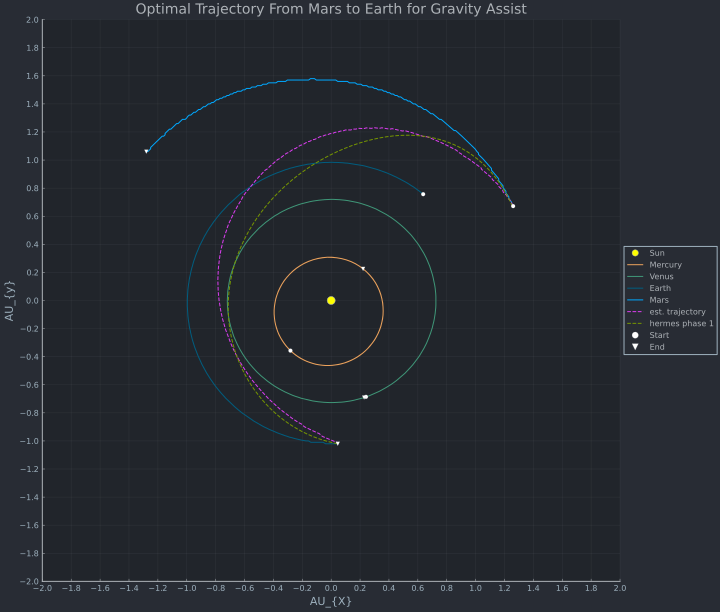

In [16]:
start = 1  
interval = start:step
startPosit=cat(Vector(mercuryData[start,:]),Vector(venusData[start,:]),Vector(earthData[start,:]),Vector(marsData[start,:]),dims=2)
endPosit=cat(Vector(mercuryData[step,:]),Vector(venusData[step,:]),Vector(earthData[step,:]),Vector(marsData[step,:]),dims=2)

theme(:juno)
X = scatter([sunPos[1]],[sunPos[2]],mc=:yellow,ms=8,label="Sun",markerstrokewidth = .5) 
plot!(X, mercuryData[interval,1],mercuryData[interval,2],label="Mercury")
plot!(X, venusData[interval,1],venusData[interval,2],label="Venus") 
plot!(X, earthData[interval,1],earthData[interval,2],label="Earth") 
plot!(X, marsData[interval,1],marsData[interval,2],label="Mars") 

plot!(X, initLinearPos[1,interval],initLinearPos[2,interval],label="est. trajectory",linestyle=:dash) 
plot!(xPhase1[1,:],xPhase1[2,:],label="hermes phase 1",linestyle=:dash)  

plot!(X, xticks=-2:.2:2,yticks=-2:.2:2,xlim=[-2,2],ylim=[-2,2],xlabel="AU_{X}",ylabel="AU_{y}")
scatter!(X, startPosit[1,:],startPosit[2,:],mc=:white,ms=4,markerstrokewidth = .1,label="Start")
scatter!(X, endPosit[1,:],endPosit[2,:],mc=:white,ms=4,markerstrokewidth = .1,markershape=:dtriangle,label="End")
plot!(X, plot!(X, legend=:outerright, legendcolumns=1,size=(1000,850))) 
title!(X, "Optimal Trajectory From Mars to Earth for Gravity Assist")

In [17]:
function GetMetrics()
    velocity = collect(value.(HV))
    total_velocity = Vector()
    for i in 1:length(velocity[1,:])
        tv = (velocity[1,i]^2 + velocity[2,i]^2)^.5
        append!(total_velocity,tv) 
    end
    V = plot(velocity[1,:],label="V_{x}",xlabel="days",ylabel="magnitude (AU/days)",title="Velocity (V)")#,
             #xlim=(startSol-1,step+1),xticks=startSol:10:step,yticks=-.03:.005:.03)
    plot!(V, velocity[2,:],label="V_{y}") 
    plot!(V, total_velocity,label="||V||",linewidth=2) 

    thrust = collect(value.(HU))
    total_thrust = Vector()
    for i in 1:length(thrust[1,:])
        tt = (thrust[1,i]^2 + thrust[2,i]^2)^.5
        append!(total_thrust,tt) 
    end
    U = plot(thrust[1,:],label="U_{x}",xlabel="days",ylabel="magnitude (N)",title="Thrust (U)")#,
       # xlim=(startSol-1,step+1),xticks=startSol:10:step,yticks=-maxThrust:50:maxThrust)
    plot!(U, thrust[2,:],label="U_{y}") 
    plot!(U, total_thrust,label="||V||",linewidth=2)   

    x = collect(value.(HX))
    X = plot(collect(1:step)*dt,
    (earthMass*hermesMass*G*1*((-x[1,:] + earthData[1:step,1]).^2 + (-x[2,:] + earthData[1:step,2]).^2).^-.5),
    yscale=:log10,label="Earth gravity")
    plot!(collect(1:step)*dt,
    (marsMass*hermesMass*G*1*((-x[1,:] + marsData[1:step,1]).^2 + (-x[2,:] + marsData[1:step,2]).^2).^-.5),
    yscale=:log10,label="Mars gravity")
    plot!(collect(1:step)*dt,
    (mercuryMass*hermesMass*G*1*((-x[1,:] + mercuryData[1:step,1]).^2 + (-x[2,:] + mercuryData[1:step,2]).^2).^-.5),
    yscale=:log10,label="Mercury gravity")
    plot!(collect(1:step)*dt,
    (venusMass*hermesMass*G*1*((-x[1,:] + venusData[1:step,1]).^2 + (-x[2,:] + venusData[1:step,2]).^2).^-.5),
    yscale=:log10,label="Venus gravity")
    plot!(X, collect(1:step)*dt,
    (sunMass*hermesMass*G*1*((sunPos[1] .- x[1,1:step]).^2 + (sunPos[2] .- x[2,1:step]).^2).^-.5),
    yscale=:log10,label="Sun gravity")
    plot!(X, yticks=yticks=10 .^ (-8.:2:8),legend=:topleft,
      ylabel="Newtons",xlabel="Days",title="Gravity felt by the Hermes (N)",size=(1000,500))

    return plot(V, U, X, layout=(3,1), legend=:right,size=(900, 1000))
end 
GetMetrics()

## 3c. Phase 2: Gravity Assist

In [18]:
function GravityAssist(angleDeg) 
    angleRad = angleDeg / 180 * pi # Convert angle to radians
    R = [cos(angleRad) -sin(angleRad); sin(angleRad) cos(angleRad)] 
    gaStartVelR = R * gaStartVel  #rotate inital HV by desired angle

    relVel = gaStartVelR - earthVel # Calculate relative velocity between Hermes and Earth
    tCA = -dot(relVel, earthPos - gaStartPos) / dot(relVel, relVel) # Calculate time of closest approach to Earth

    #++++++ CALC. RELATIVE V AND X @ CLOSEST APPROACH TO EARTH ++++++#
    gaStartPosCA = gaStartPos + gaStartVelR * tCA
    earthPosCA = earthPos + earthVel * tCA
    relPosCA = gaStartPosCA - earthPosCA
    relVelCA = relVel

    # Calculate ΔV due to gravity assist
    ΔV = -2 * dot(relVelCA, relPosCA) / norm(relPosCA)^2 * relPosCA 

    # Calculate final velocity vector of spacecraft
    gaEndVel = gaStartVelR + ΔV + gaStartU / hermesMass * tCA 

    
    distanceTraveled = norm(gaStartPosCA - gaStartPos) #total distance traveled by hermes during gravity assist
    t = distanceTraveled / norm(ΔV)    #total time of gravity assist in days
    gaEndPos = gaStartPos + gaEndVel * t #Hermes end position

# Print time of maneuver
    println("Time of maneuver (min): ", t * 1440)
    println("Time of maneuver (DAYS): ", t)
    println("Hermes Final Position (AU): ", round.(gaEndPos,digits=6))
    println("Hermes Final velocity (AU/DAYS): ", round.(gaEndVel,digits=6))   
    println() 
    println("Hermes entering speed: ", round.(finalV_km,digits=3), " km/s") 
    println("Hermes exiting speed: ", round(sqrt(gaEndVel[1]^2 + gaEndVel[2]^2)*1731.46,digits=3)," km/s")
    return gaEndPos, gaEndVel
end

GravityAssist (generic function with 1 method)

In [19]:
angleDeg = 120
gaEndPos, gaEndVel = GravityAssist(angleDeg);

Time of maneuver (min): 6.950118322852735
Time of maneuver (DAYS): 0.004826471057536621
Hermes Final Position (AU): [0.045409, -1.01999]
Hermes Final velocity (AU/DAYS): [0.045539, 0.002119]

Hermes entering speed: 31.538 km/s
Hermes exiting speed: 78.935 km/s


## 3d. Phase 3: Earth to Mars 
The final phase consists of traveling from earth back to mars. Due to the ill-positioned planets, phase 3 is the longest leg of the mission, spanning 325 Sols in the movie. Due to the planets' position, using the same linear interpolation equation as in *phase 1* is not feasible as the planets are not on opposite sides of the solar system. We therefore need to slightly modify the interpolation by making it nonlinear. <br>  
$$  
\begin{aligned} 
&\begingroup 
\large
\mathbf{x}_{i}^{\text{est.}} = \Bigg(1- \left(\frac{i}{n}\right)^\beta\Bigg)*\mathbf{x}_{i}^{\text{start}} + \left(\frac{i}{n}\right)^\beta*\mathbf{x}_{i}^{\text{dest}} + \mathbf{C} \qquad \forall i \in {1,\dots,n}\\ 
\endgroup \\
&\text{where:}\\
& \qquad \mathbf{C} \text{ is an offset for the planet's initial position from Mars}\\  
& \qquad \beta \text{ is the scaling factor of the path} \\   
\end{aligned} 
$$ 
<br><br>
$$ 
\begin{aligned}
&\begingroup 
\large
\mathbf{v}_{i}^{\text{est.}} = dt*\left(\mathbf{x}_{i+1}^{\text{est.}} - \mathbf{x}_{i}^{\text{est.}}\right) \qquad \forall i \in {1,\dots,n-1}\\ 
\endgroup\\
&\text{where:}\\
& \qquad dt \text{ is time step [days]}\\ 
\end{aligned} 
$$
<br><br>

In [20]:
#++++++ NEW PARAMETERS ++++++# 
interV = 12
dt = interV/12
startPhase3 = 225  
startData = Int64(startPhase3 * 12)
mercuryData3 = Matrix(mercury_raw[startData:interV:end,["X","Y"]])
venusData3 = Matrix(venus_raw[startData:interV:end,["X","Y"]])
earthData3 = Matrix(earth_raw[startData:interV:end,["X","Y"]])
marsData3 = Matrix(mars_raw[startData:interV:end,["X","Y"]])

JourneyLen =  295 / dt 
step = Int64(round(JourneyLen))
Tmax = 220
λ = 100 
μ = 10
m = Model(Ipopt.Optimizer)  
set_optimizer_attributes(m, "print_level" => 3, "max_iter" => 8000,"tol" => .01)


#++++++ DEFINE VARIABLES FOR PROBE POSITIONS, VELOCITIES, AND THRUSTS ++++++#
@variable(m, HX[1:2,1:step])
@variable(m, HV[1:2,1:step])
@variable(m, HU[1:2,1:step]) 

destData3 = marsData3


#++++++ SET ESTIMATED NONLINEAR TRAJECTORY ++++++#
offSet = gaEndPos + [-.1 1]'  #moves the trajectory in the right position relative to earth and mars
initLinearPos3 = zeros(2,step)
initLinearVel3 = zeros(2,step)

for i in 1:step 
    factor = (i/step)^2.5    
    initLinearPos3[:,i] = (earthData3[i,1:2]'.*(1-factor))+ (marsData3[i,1:2]'.*factor) .+ offSet' 
end 

for i in 1:step-1
    initLinearVel3[:,i] = (initLinearPos3[:,i+1]-initLinearPos3[:,i])*dt
end

for i in 1:2 
    for j in 1:step
        set_start_value(HX[i,j], initLinearPos3[i,j])
        set_start_value(HV[i,j], initLinearVel3[i,j]) 
    end
end;

**will run a maximum of 2 minutes**

In [21]:
for i in 1:step-1
    #++++++ CURRENT POS IS PREV. POSITION + PREV. VELOCITY ++++++#
    @constraint(m, HX[:,i+1] .== HX[:,i] + dt*HV[:,i])
    
    #++++++ CURRENT VELOCITY IS PREV. + THRUST + GRAVITY ++++++#
    @NLconstraint(m, HV[1,i+1] == HV[1,i] + dt*α*(HU[1,i]/hermesMass + 
        sunMass*G*(sunPos[1] - HX[1,i])/((HX[1,i] - sunPos[1])^2 + (HX[2,i] - sunPos[2])^2)^1.5 +
        mercuryMass*G*(mercuryData3[i,1] - HX[1,i])/((HX[1,i] - mercuryData3[i,1])^2 + 
            (HX[2,i] - mercuryData3[i,2])^2)^1.5 +
        venusMass*G*(venusData3[i,1] - HX[1,i])/((HX[1,i] - venusData3[i,1])^2 + (HX[2,i] - venusData3[i,2])^2)^1.5 +
        earthMass*G*(earthData3[i,1] - HX[1,i])/((HX[1,i] - earthData3[i,1])^2 + (HX[2,i] - earthData3[i,2])^2)^1.5 +
        marsMass*G*(marsData3[i,1] - HX[1,i])/((HX[1,i] - marsData3[i,1])^2 + (HX[2,i] - marsData3[i,2])^2)^1.5))# +
    @NLconstraint(m, HV[2,i+1] == HV[2,i] + dt*α*(HU[2,i]/hermesMass + 
        sunMass*G*(sunPos[2] - HX[2,i])/((HX[1,i] - sunPos[1])^2 + (HX[2,i] - sunPos[2])^2)^1.5 + 
        mercuryMass*G*(mercuryData3[i,2] - HX[2,i])/((HX[1,i] - mercuryData3[i,1])^2 + 
            (HX[2,i] - mercuryData3[i,2])^2)^1.5 + 
        venusMass*G*(venusData3[i,2] - HX[2,i])/((HX[1,i] - venusData3[i,1])^2 + (HX[2,i] - venusData3[i,2])^2)^1.5 +
        earthMass*G*(earthData3[i,2] - HX[2,i])/((HX[1,i] - earthData3[i,1])^2 + (HX[2,i] - earthData3[i,2])^2)^1.5 +
        marsMass*G*(marsData3[i,2] - HX[2,i])/((HX[1,i] - marsData3[i,1])^2 + (HX[2,i] - marsData3[i,2])^2)^1.5))
end

#++++++ KEEP THRUST BELOW CERTAIN VALUE ++++++#
@constraint(m, Tmax .<= (HU[1,:].^2+HU[2,:].^2) .<= Tmax^2)

#++++++ INITIAL CONSTRAINTS FOR HERMES ++++++#
@constraint(m, HX[:,1] .== gaEndPos[:])
@constraint(m, HV[:,1] .== gaEndVel[:])   

#++++++ RENDEZVOUS CONSTRAINTS FOR HERMES ++++++#
@constraint(m,(HX[1,step]-marsData3[step,1])^2 + (HX[2,step]-marsData3[step,2])^2 <= .09^2) 
#@constraint(m, (HX[1, step] <= destData3[step,1])) #.001
#@constraint(m, (HX[2, step] <= destData3[step,2]))  


#@constraint(m, HV[1,step].^2 + HV[2,step].^2 .<= 2.31019e-3^2)  

#++++++ MIN DISTANCE FROM SUN ++++++# 
@constraint(m, HX[1,:].^2 + HX[2,:].^2 .>= minSun)  

#++++++ CANNOT LEAVE INNER SOLAR SYSTEM ++++++#
@constraint(m,-1.2 .<= HX .<= 1.2)
@objective(m, Min, λ*sum((HU[1,1:step-1]-HU[1,2:step]).^2 + (HU[2,1:step-1]-HU[2,2:step]).^2) + 
sum((HU[1,:].^2 + HU[2,:].^2)) + μ*sum(HV[1,step].^2 + HV[2,step].^2)
# + sum((HX[1,i]-marsData3[i,1])^2 + (HX[2,i]-marsData3[i,2])^2 for i in 1:step)
)

    
@time(optimize!(m))   
println() 
println(termination_status(m)) 

xPhase3 = value.(HX)
vPhase3 = value.(HV)
uPhase3 = value.(HU) 
xEnd3 = xPhase3[:,step] 
vEnd3 = vPhase3[:,step]
uEnd3 = uPhase3[:,step];

Total number of variables............................:     1770
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1180
Total number of inequality constraints...............:     2066
        inequality constraints with only lower bounds:     1180
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      886


Number of Iterations....: 1346

                                   (scaled)                 (unscaled)
Objective...............:   1.6112515040049076e+07    1.6112515040049076e+07
Dual infeasibility......:   2.7178558803158216e+04    2.7178558803158216e+04
Constraint violation....:   2.8000234696327730e-02    2.8000234696327730e-02
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementa

In [22]:
#++++++ CAPTURE VALUES ++++++#
xPhase3 = value.(HX)
vPhase3 = value.(HV)
uPhase3 = value.(HU) 
xEnd3 = xPhase3[:,step] 
vEnd3 = vPhase3[:,step]
uEnd3 = uPhase3[:,step];
println("spacecraft final position relative to the sun (AU): ",round.(xEnd3,digits=3)) 
println("spacecraft final velocity (AU/days): ",round.(vEnd3,digits=3)) 
println("spacecraft final thrust (N): ",round.(uEnd3,digits=3))  

spacecraft final position relative to the sun (AU): [0.34, -1.2]
spacecraft final velocity (AU/days): [0.016, -0.006]
spacecraft final thrust (N): [-5.544, 125.725]


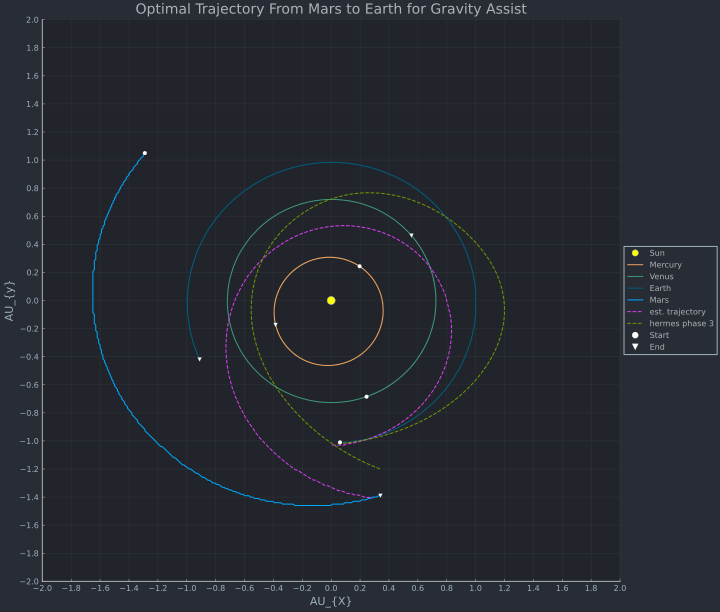

In [23]:
start = 1  
interval = start:step
startPosit=cat(Vector(mercuryData3[start,:]),Vector(venusData3[start,:]),Vector(earthData3[start,:]),Vector(marsData3[start,:]),dims=2)
endPosit=cat(Vector(mercuryData3[step,:]),Vector(venusData3[step,:]),Vector(earthData3[step,:]),Vector(marsData3[step,:]),dims=2)

theme(:juno)
X = scatter([sunPos[1]],[sunPos[2]],mc=:yellow,ms=8,label="Sun",markerstrokewidth = .5) 
plot!(X, mercuryData3[interval,1],mercuryData3[interval,2],label="Mercury")
plot!(X, venusData3[interval,1],venusData3[interval,2],label="Venus") 
plot!(X, earthData3[interval,1],earthData3[interval,2],label="Earth") 
plot!(X, marsData3[interval,1],marsData3[interval,2],label="Mars") 

#data31 = value.(AX)
plot!(X, initLinearPos3[1,interval],initLinearPos3[2,interval],label="est. trajectory",linestyle=:dash) 
plot!(xPhase3[1,:],xPhase3[2,:],label="hermes phase 3",linestyle=:dash)  

plot!(X, xticks=-2:.2:2,yticks=-2:.2:2,xlim=[-2,2],ylim=[-2,2],xlabel="AU_{X}",ylabel="AU_{y}")
scatter!(X, startPosit[1,:],startPosit[2,:],mc=:white,ms=4,markerstrokewidth = .1,label="Start")
scatter!(X, endPosit[1,:],endPosit[2,:],mc=:white,ms=4,markerstrokewidth = .1,markershape=:dtriangle,label="End")
plot!(X, plot!(X, legend=:outerright, legendcolumns=1,size=(1000,850))) 
title!(X, "Optimal Trajectory From Mars to Earth for Gravity Assist")

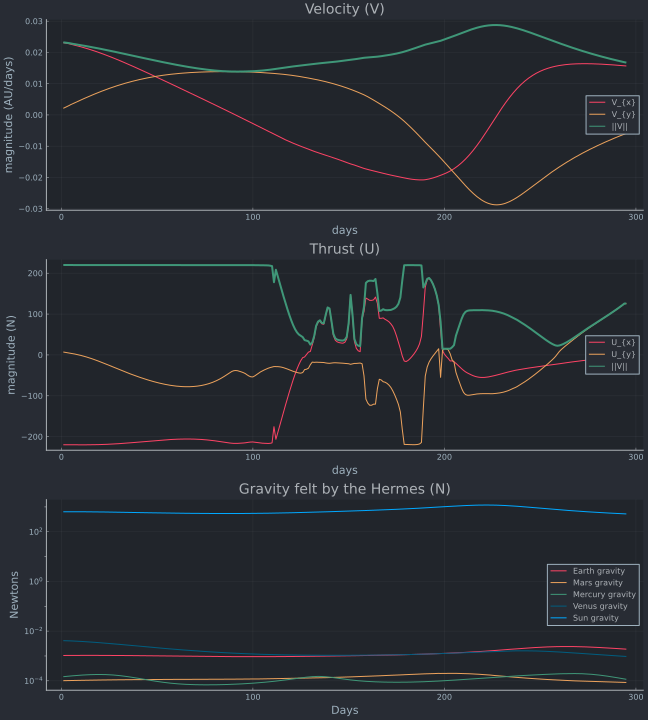

In [24]:
GetMetrics()

# 4. Results and Discussion

#### 4a. Phase 1
We were able to reach earth at a feasible velocity and position at 225 sols, which is only .3 days longer than what the movie dictated. The model was able to bring The hermes 0.0004 60,000km away from earth, around 1/6400 the distance from the Earth the moon. Eyeballing the relative distance from the earth to the Hermes in the movie, our result seems to be a little further than that in movie, however, 60,000km is feasible enough to gain speed and alter the direction of the Hermes. <br> 
<br>
Below is a visualization as to how close the Hermes comes to Earth in our model, around 60,000km from earth:

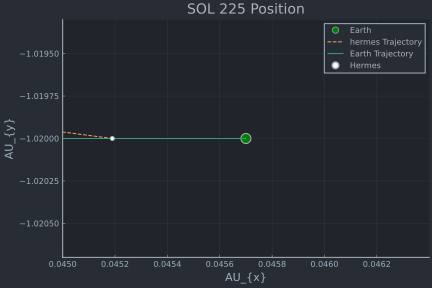

In [25]:
start = 1 
interval = start:225 

initEarthPos = earthData[225,:]   

scatter([initEarthPos[1]],[initEarthPos[2]],label="Earth",mc=:green,markersize=10,) 
plot!(xlim=(initEarthPos[1]-.0007,initEarthPos[1]+.0007),ylim=(initEarthPos[2]-.0007,initEarthPos[2]+.0007),
      title="SOL 225 Position",xlabel="AU_{x}",ylabel="AU_{y}")   
plot!(xPhase1[1,:],xPhase1[2,:],label="hermes Trajectory",linestyle=:dash) 
plot!(earthData[interval,1],earthData[interval,2],label="Earth Trajectory") 
scatter!([gaStartPos[1]], [gaStartPos[2]],label="Hermes",mc=:white,) 

#### 4b Phase 2 
We have theoretically solved for the optimal exit angle $\alpha$ by maximizing the magnitude of $\vec{v}_{final}$. However, the model would be very difficult to solve as it is nonlinear and nonconvex. We determined a reasonable $\alpha$ to be 120 degrees, which resulted in a greater magnitude of velocity in both the positive *x* and *y* direction. Despite not being able to model the gravity assist itself, the results were quite realistic with a total time of around 7 minutes and an exitting at an impressive speed of 79 km/s, more than double our initial speed. 

#### 4c Phase 3 
Due to the complexity of the entire trajectory, we were not able to find a feasible solution. This is to be somewhat expected as we are forced to model each phase separately from one another, whereas in reality they need to be modeled together, especially when a multi-billion dollar spacecraft and someone's life is on the line. We did however capture the values of the decision variables, as they seemed somewhat realistic. The part of the objective desiring the Hermes to slow down around Mars actually helped in the process of solving the model, even though one would think that constraining the final speed would lead further from a feasible solution. In the movie, the Hermes passes very close to the sun. The book itself discusses the dangerous levels of radiation, and that coming close to Venus mitigates those effects for various reasons. Our intermediate models brought us close to venus where the Hermes' trajectory was thrown off course which was interesting to see. The visualizations of those models can be found in the appendix. This goes to delicate the entirety of the model is, as there are a multitude of local minima, and even more points of infeasibility. 

### 4d. Flight Path Of The Hermes

In [26]:
x = vcat(xPhase1',xPhase3')'
velocity = vcat(vPhase1',vPhase3')'
thrust = vcat(uPhase1',uPhase3')'
total_t = length(thrust[1,:]) 
ga_time = 225 
est_traject = vcat(initLinearPos',initLinearPos3')';

In [27]:
start = 1  
interval = start:total_t
startPosit=cat(Vector(mercuryData[start,:]),Vector(venusData[start,:]),Vector(earthData[start,:]),Vector(marsData[start,:]),dims=2)
endPosit=cat(Vector(mercuryData[total_t,:]),Vector(venusData[total_t,:]),Vector(earthData[total_t,:]),Vector(marsData[total_t,:]),dims=2)

theme(:juno)
X = scatter([sunPos[1]],[sunPos[2]],mc=:yellow,ms=8,label="Sun",markerstrokewidth = .5) 
plot!(X, mercuryData[interval,1],mercuryData[interval,2],label="Mercury")
plot!(X, venusData[interval,1],venusData[interval,2],label="Venus") 
plot!(X, earthData[interval,1],earthData[interval,2],label="Earth",linecolor=:darkred) 
plot!(X, marsData[interval,1],marsData[interval,2],label="Mars") 

plot!(X, est_traject[1,interval],est_traject[2,interval],label="est. trajectory",linestyle=:dot,linewidth=.5) 
plot!(X, initLinearPos[1,start:end],initLinearPos[2,start:end],label="est. trajectory phase 1",linestyle=:dot,linewidth=.5,linecolor=:yellow)  
plot!(X, initLinearPos3[1,start:end],initLinearPos3[2,start:end],label="est. trajectory phase 3",linestyle=:dot,linewidth=.5,linecolor=:orange) 
plot!(x[1,:],x[2,:],label="Hermes Path",linestyle=:dash,linecolor=:white,linewidth=.8)  

plot!(X, xticks=-2:.2:2,yticks=-2:.2:2,xlim=[-2,2],ylim=[-2,2],xlabel="AU_{X}",ylabel="AU_{y}")
scatter!(X, startPosit[1,:],startPosit[2,:],mc=:white,ms=4,markerstrokewidth = .1,label="Start")
scatter!(X, endPosit[1,:],endPosit[2,:],mc=:white,ms=4,markerstrokewidth = .1,markershape=:dtriangle,label="End") 
scatter!(X, [x[1,ga_time]],[x[2,ga_time]],ms=7,mc=:magenta,label="Position of gravity assist",markershape=:x,markerstrokecolor=:magenta,markerstrokewidth=3)
plot!(X, plot!(X, legend=:outerright, legendcolumns=1,aspectratio=:equal,size=(1400,1000))) 
title!(X, "Optimal Trajectory From Mars to Earth for Gravity Assist")

sys:1: UserWarning: You passed a edgecolor/edgecolors (<jl [1.0, 0.0, 1.0, 1.0]>) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


The Path of phase 1 from mars to the position of the gravity assist looks almost identical to that in the film, where it curves slightly upward in the beginning and grazes Venus' orbit before coming in contact with Earth. The infeasible trajectory in phase 3 goes much further outward than in the movie. This could be because our $\lambda$ value is too great, or that our exit angle is not great enough. Our approach of 60,000km in phase 1 could also play a factor. Each model becomes less accurate the more it gets broken up into different parts. 

## 4e. Metrics of The Mission Duration

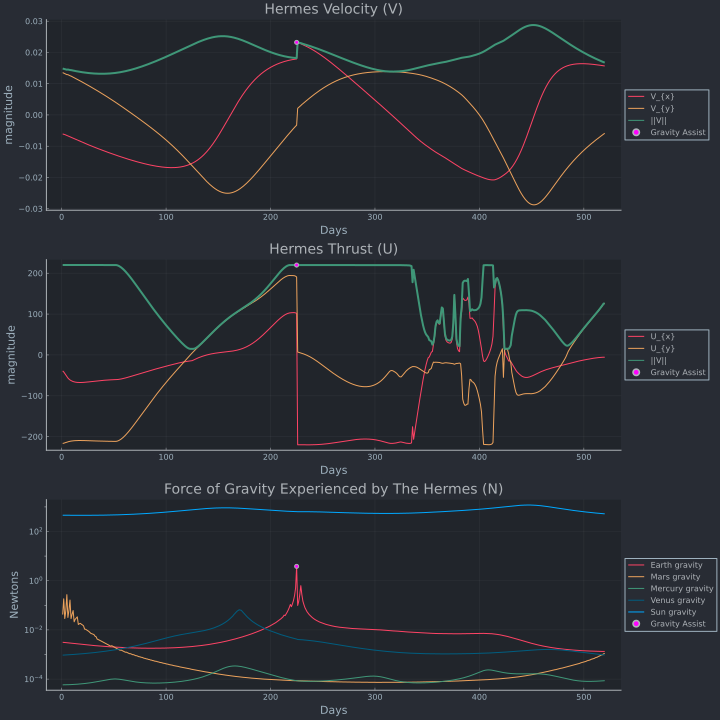

In [28]:
velocity = vcat(vPhase1',vPhase3')'

total_velocity = Vector()
for i in 1:length(velocity[1,:])
    tv = (velocity[1,i]^2 + velocity[2,i]^2)^.5
    append!(total_velocity,tv) 
end
V = plot(velocity[1,:],label="V_{x}",xlabel="Days",ylabel="magnitude",title="Hermes Velocity (V)")#,
         #xlim=(startSol-1,step+1),xticks=startSol:10:step,yticks=-.03:.005:.03)
plot!(V, velocity[2,:],label="V_{y}") 
plot!(V, total_velocity,label="||V||",linewidth=2) 
scatter!(V,[ga_time], [total_velocity[ga_time+1,:]],label="Gravity Assist",mc=:magenta)
thrust = vcat(uPhase1',uPhase3')'
total_thrust = Vector()
for i in 1:length(thrust[1,:])
    tt = (thrust[1,i]^2 + thrust[2,i]^2)^.5
    append!(total_thrust,tt) 
end
U = plot(thrust[1,:],label="U_{x}",xlabel="Days",ylabel="magnitude",title="Hermes Thrust (U)")
plot!(U, thrust[2,:],label="U_{y}") 
plot!(U, total_thrust,label="||V||",linewidth=2)   
scatter!(U,[ga_time], [total_thrust[ga_time+1,:]],label="Gravity Assist",mc=:magenta)

x = vcat(xPhase1',xPhase3')'
X = plot(collect(1:total_t),
(earthMass*hermesMass*G*1*((-x[1,:] + earthData[1:total_t,1]).^2 + (-x[2,:] + earthData[1:total_t,2]).^2).^-.5),
yscale=:log10,label="Earth gravity")
plot!(collect(1:total_t),
(marsMass*hermesMass*G*1*((-x[1,:] + marsData[1:total_t,1]).^2 + (-x[2,:] + marsData[1:total_t,2]).^2).^-.5),
yscale=:log10,label="Mars gravity")
plot!(collect(1:total_t),
(mercuryMass*hermesMass*G*1*((-x[1,:] + mercuryData[1:total_t,1]).^2 + (-x[2,:] + mercuryData[1:total_t,2]).^2).^-.5),
yscale=:log10,label="Mercury gravity")
plot!(collect(1:total_t),
(venusMass*hermesMass*G*1*((-x[1,:] + venusData[1:total_t,1]).^2 + (-x[2,:] + venusData[1:total_t,2]).^2).^-.5),
yscale=:log10,label="Venus gravity")
plot!(X, collect(1:total_t),
(sunMass*hermesMass*G*1*((sunPos[1] .- x[1,1:total_t]).^2 + (sunPos[2] .- x[2,1:total_t]).^2).^-.5),
yscale=:log10,label="Sun gravity")
plot!(X, yticks=yticks=10 .^ (-8.:2:8),legend=:topleft,
  ylabel="Newtons",xlabel="Days",title="Force of Gravity Experienced by The Hermes (N)",size=(1000,500))  
scatter!(X,[225],[(earthMass*hermesMass*G*1*((-x[1,ga_time] + earthData[ga_time,1]).^2 + (-x[2,ga_time] + earthData[ga_time,2]).^2).^-.5)],label="Gravity Assist",mc=:magenta)
plot(V, U, X, layout=(3,1), legend=:outerright,size=(1000, 1000))



**It should be noted that values past 225 Sols repesent the phase 3 infeasible model, which explains the change in pattern** <br> 
**Everything discussed below only addresses the results before phase 3**
#### Velocity 
The velocity of the Hermes indicates constant acceleration, verifying the that the gravitational forces and the thrust are properly adjusting the velocity as needed.  

#### Thrust 
The thrust follows a decreasing linear trend, this means that the gravity assist worked and that the thrust is being conserved. The plot for Thrust is useless after Sol 225 due to the program infeasibility.
#### Gravity
Gravity for earth peaks at the gravity assist which aligns with the physics of the gravity assist. Also note Mars' gravity in the beginning when the Hermes leaves the red planet.

## 4f. Challenges and Improvements
The greatest challenge of this project was the time it takes to solve the models. Most of the time if a model cannot be solved within a few seconds there is no reason in continuing to solve. However, the phase 1 model would take around 1 and 2 minutes to solve. Therefore, we were forced to wait that time to see if the solution came back as feasible. If it comes back as infeasible, we had to tweak the model and wait another two minutes before getting back a result. The precision of the datapoints and the time step was also a challenge. We initially attempted a timestep of 2 hours. However, because it takes 225 days to reach Earth from Mars, it was difficult to optimally solve the nonlinear model with so many variables in a reasonable amount of time. We ended up using a timestep of one day for phase 1 which helped. We adjusted the interval to see if we could get a feasible solution for phase 3, but nothing came back feasible. We ended up spending a little over 35 hours trying to achieve the best optimal solution for the models. If we were to attempt this problem again, we would learn more about NLPs and modeling methods. We would also attempt access to a more robust solver, as Ipopt takes a considerable amount of time to solve the problem. The significant figures of the planet coordinate positions were too low as well. We realized this at the very end when we tried to redownload data from the New Horizons program by the NASA Jet Propulsion Lab. By converting the .txt file to a .csv file using Microsoft Excel, the software automatically reduces the significant figures unless all columns are converted to *general* format. Would we have had more time, we would have gone back to correct this error.

# 5. Conclusion

In summary, we were able to hit our objective for the first phase of the mission, Mars to Earth. Using optimization we hit roughly the same time of 225 sols as it took in the movie. Phase 2 was also theoretically solved after adjusting the angle of entry and the entry velocity to a point where the gravity assist would work. We were able to maximize the exit velocity which is one of the most crucial elements of the gravity assist. However, phase 3 was too complex for us to solve and would need further research into nonlinear programming. It would be fun to continue these models to the point where we could get the third model to work. Once we get all three models it would be interesting to look into how to bring them all together into one. A cool point of exploration would be trying to build a single model where we are able to vary the timestep to adjust for longer travel, such as going from Earth to Mars, and for shorter more precise movements, such as the gravity assist. A good follow up to this would be further exploration into using gravity to navigate the solar system while minimizing fuel usage. With that potential model we could traverse the solar system potentially using multiple gravity assists to our advantage and helping us with both speed and fuel consumption.

# 6. Citations ##
https://www.insidescience.org/news/inside-spaceflight-martian#:~:text=The%20Hermes%20would%20scream%20by,with%20a%20rocket%20containing%20Watney. <br>
https://www.facebook.com/462962073803090/photos/a.463868883712409.1073741828.462962073803090/682817308484231/ <br> 
https://docs.poliastro.space/en/stable/examples/Natural%20and%20artificial%20perturbations.html <br>
http://www.galactanet.com/martian/hermes.mp4 <br> 
https://archive.briankoberlein.com/2015/10/06/the-science-behind-the-martian-hermes-spacecraft/index.html <br> 
https://ssd.jpl.nasa.gov/horizons/app.html#/  <br>
https://excursionset.com/blog/2015/10/5/sciencing-the-martian <br> 
https://nbviewer.org/urls/laurentlessard.com/teaching/cs524/project/Spring2016/ScottPatenaude.ipynb

**gravity assist**  <br>
https://physics.stackexchange.com/questions/154854/maths-behind-gravity-assist  
<br><br> 

# Appendix 1: The Hermes Trajectory from the movie "The Martian" 
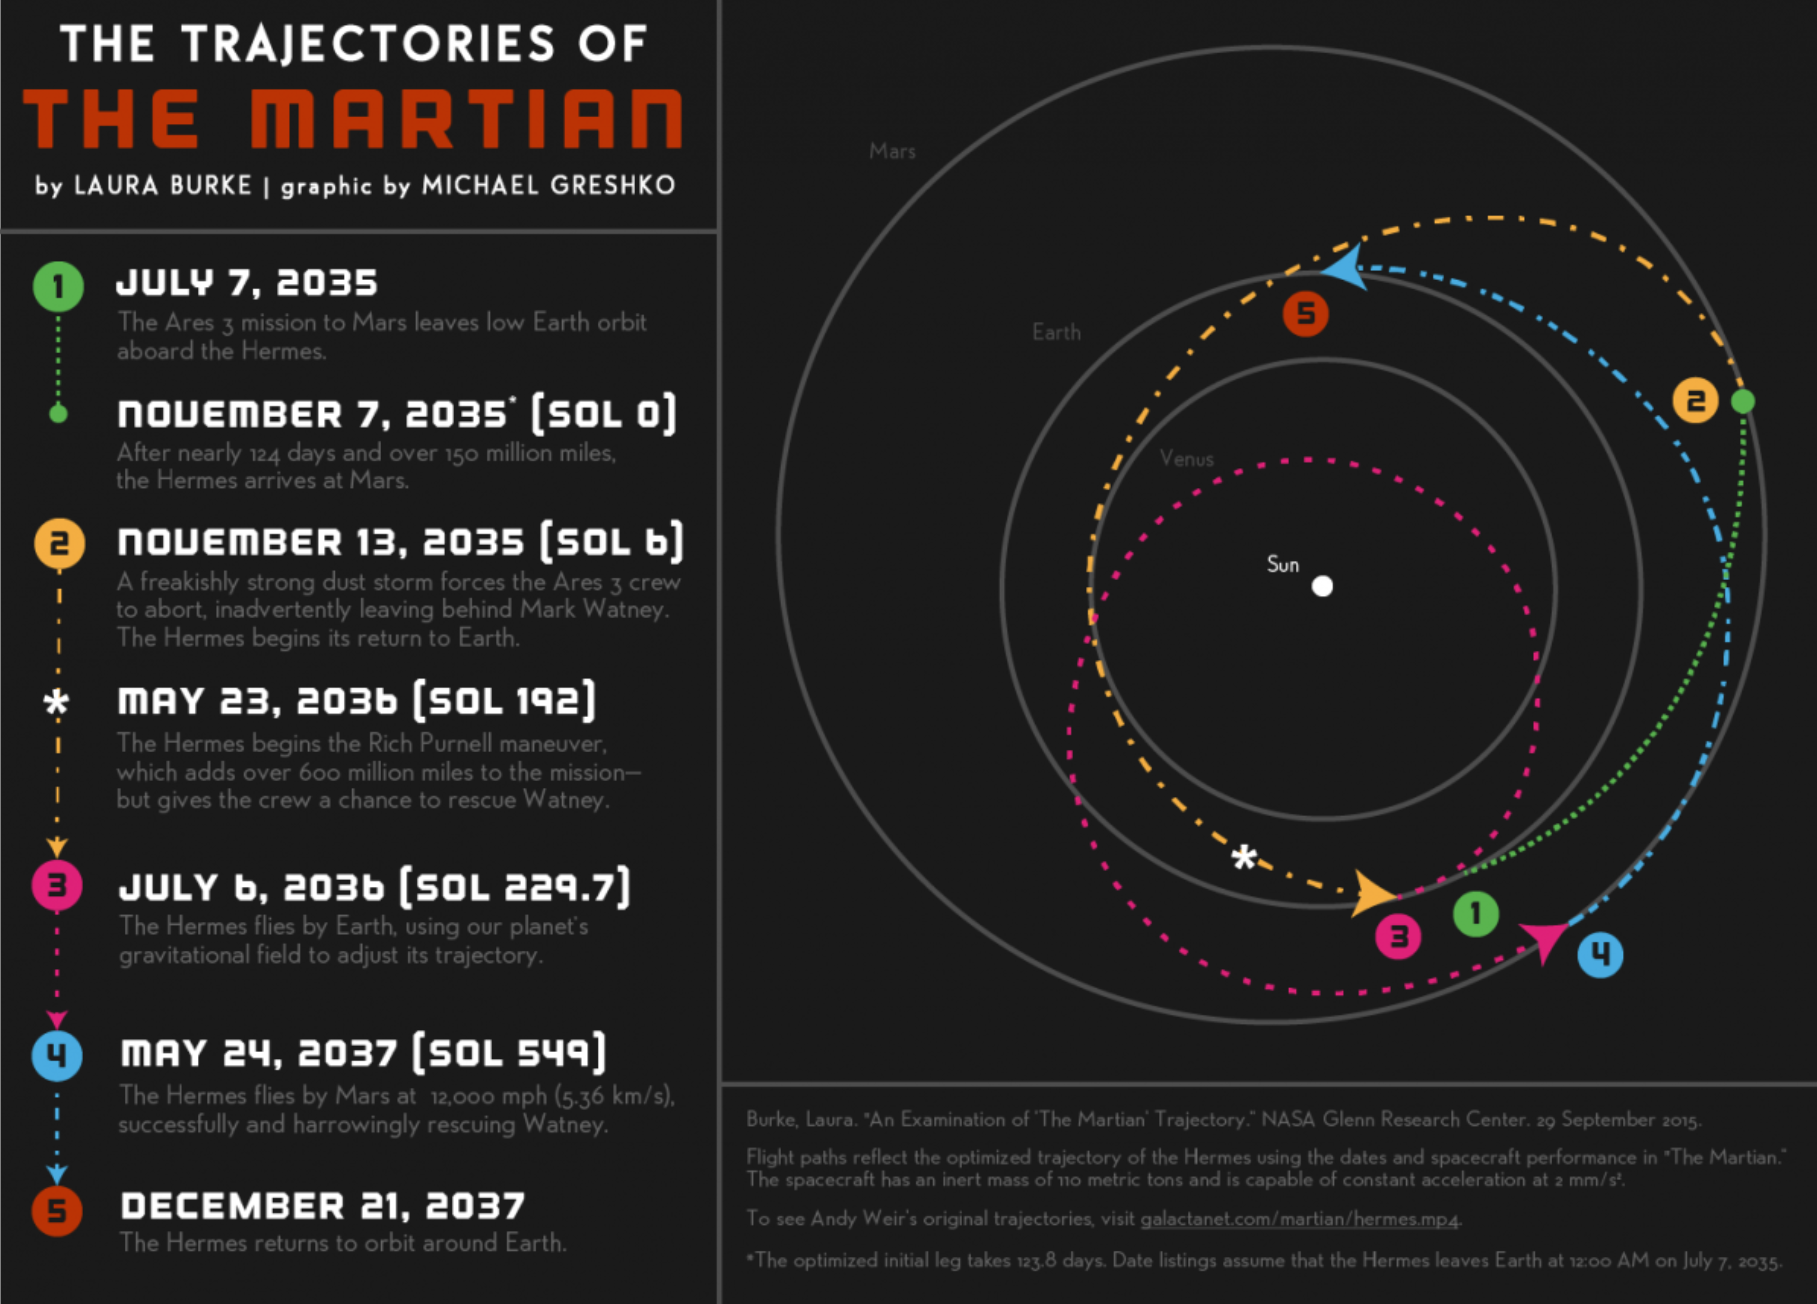

# Appendix 2: Phase 3 close encounter with Venus 
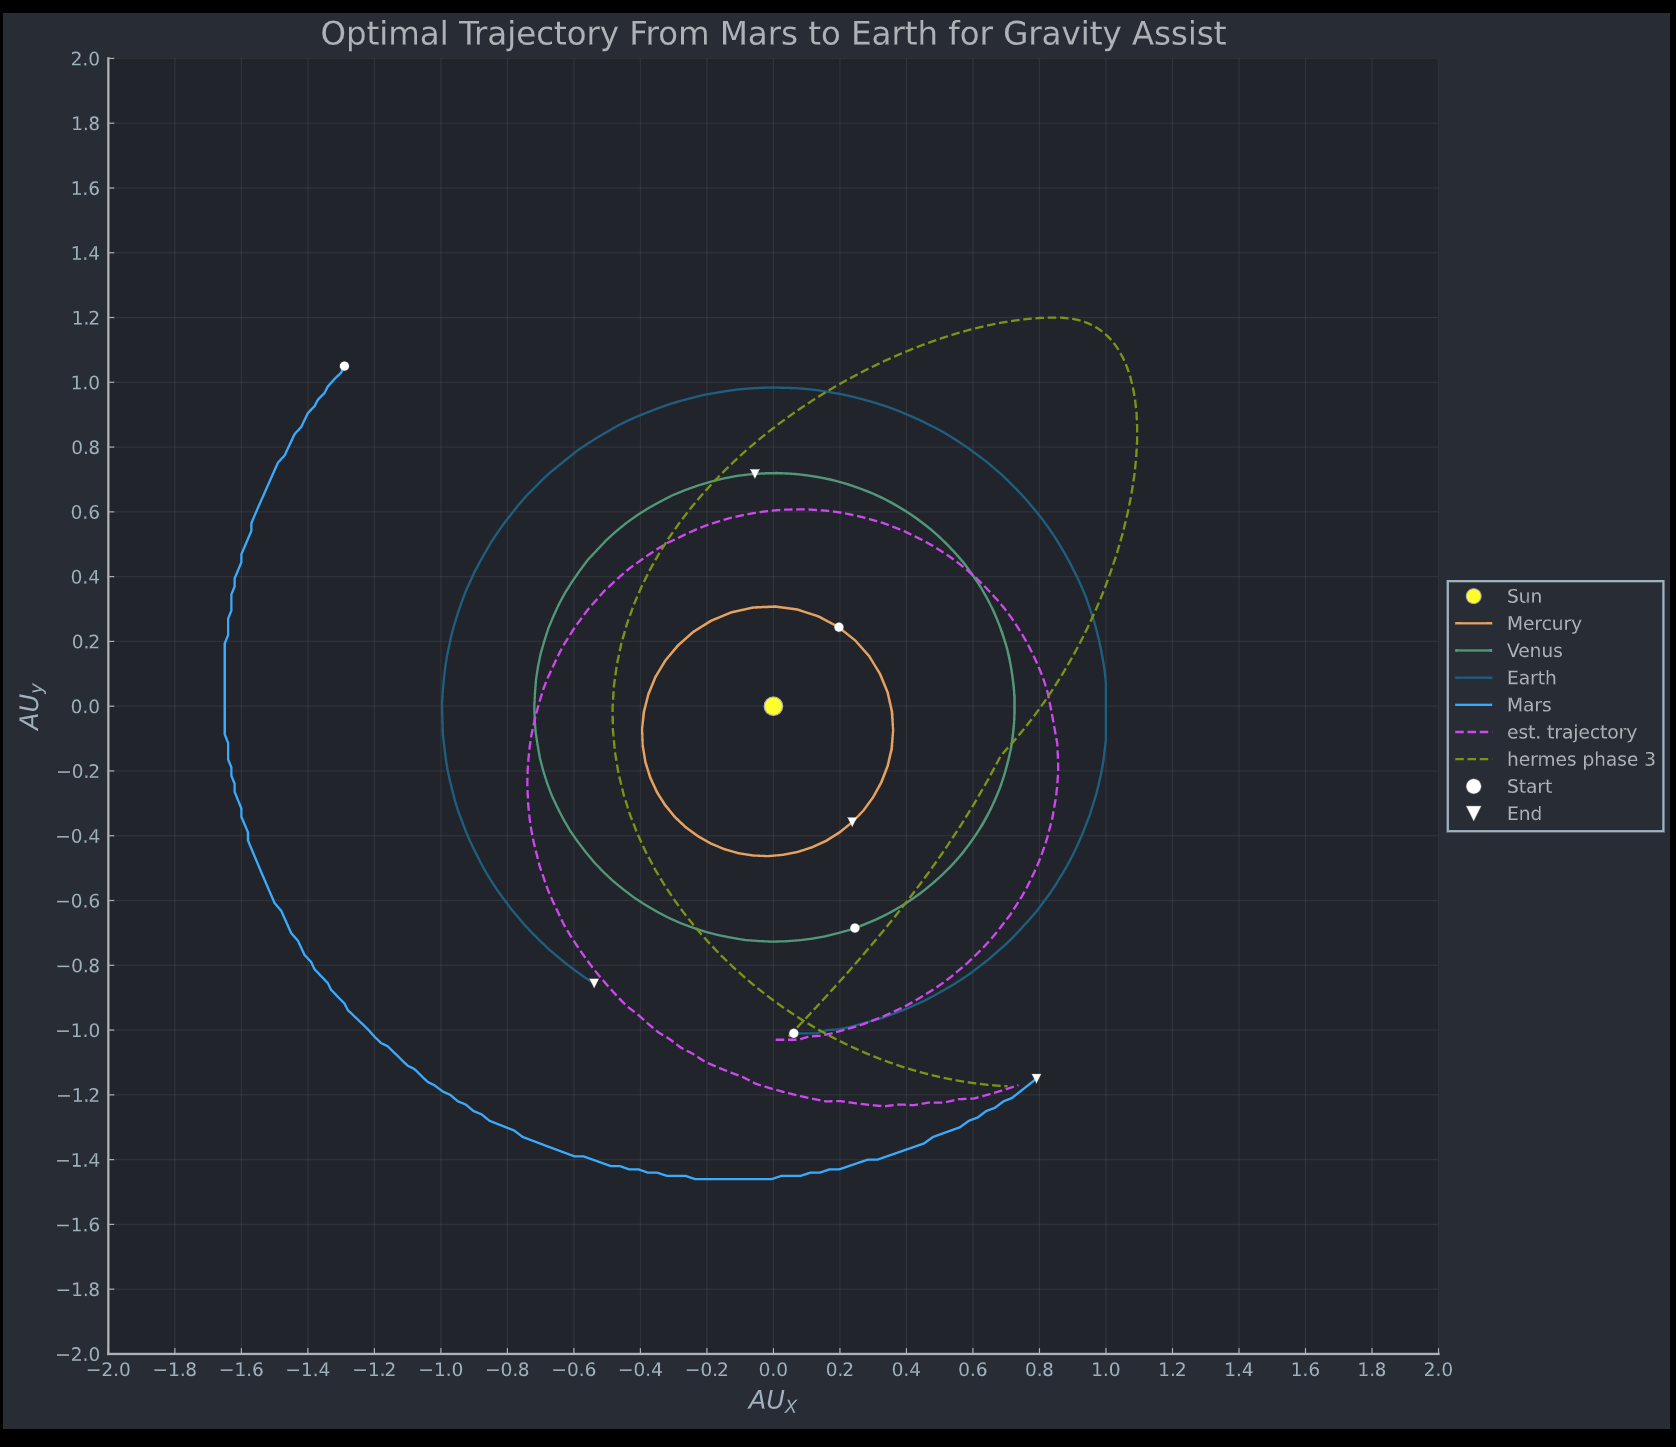 
<br><br>
**Notice the sudden change in trajectory as the Hermes approaches Venus** 
<br><br> 
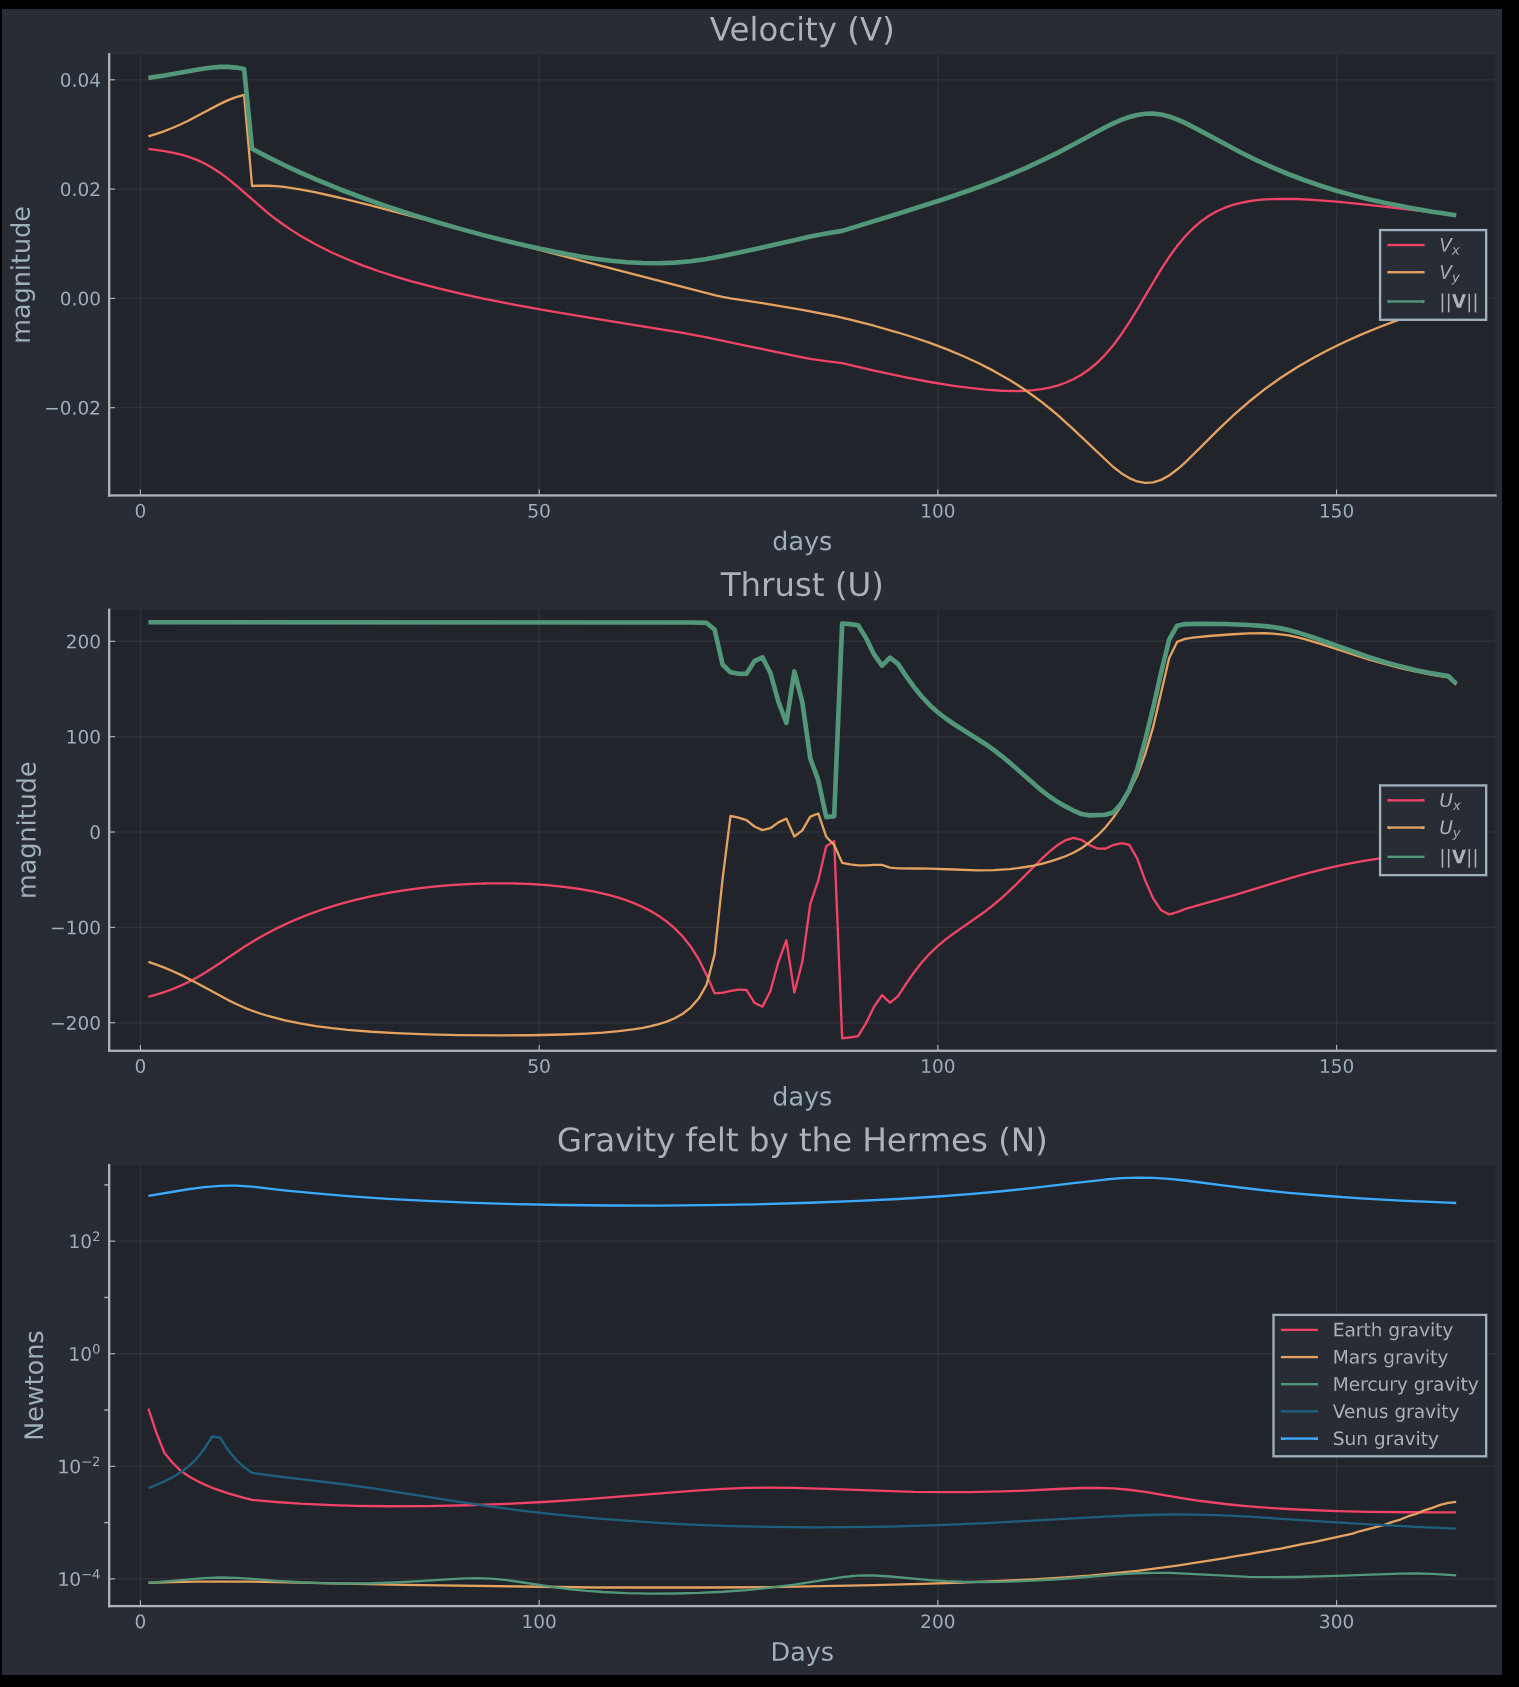
